#**Final Project 2025 - Estimation of Obesity Levels**
**Based on Eating Habits and Physical Condition**<br><br>
**Student:** Daud Rusyad Nurdin, DA/DS bootcamp Dibimbing.id, batch 34



# **Library Preparation**

In [116]:
# Library data
import numpy as np #number
import pandas as pd

# Library grafik
import seaborn as sns
import matplotlib.pyplot as plt

# Library preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Menghilangkan warning yang tidak perlu
import warnings
warnings.filterwarnings('ignore')

#**Exploratory Data Analysis (EDA)**

##**Data Understanding**

###**Read Data**

In [117]:
# Read data set from github
file_name = "ObesityDataSet_raw_and_data_sinthetic.csv"
def load_data():
    url = "https://raw.githubusercontent.com/daudrusyadnurdin/final-project-2025/main/data/" + file_name
    return pd.read_csv(url)

df = load_data()

###**Data Structure**
Source: https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees

Dataset Characteristics|Subject Area|Associated Tasks
-----------------------|------------|----------------
Multivariate|Health and Medicine|Classification, Regression, Clustering

Variable Name|	Role|	Type|	Description|	Units|	Missing Values
-------------|-----|-----|------------|-------|-----------
Gender|	Feature|	Categorical|	Gender|			|no
Age|	Feature|	Continuous|	Age|			|no
Height|	Feature|	Continuous|		|		|no
Weight|	Feature|	Continuous|		|		|no
family_history_with_overweight|	Feature|	Binary|		Has a family member suffered or suffers from overweight?|		|no
FAVC|	Feature|	Binary|		Do you eat high caloric food frequently?	|	|no
FCVC|	Feature|	Integer|		Do you usually eat vegetables in your meals?	|	|no
NCP|	Feature|	Continuous|		How many main meals do you have daily?	|	|no
CAEC|	Feature|	Categorical|		Do you eat any food between meals?	|	|no
SMOKE|	Feature|	Binary|		Do you smoke?	|	|no
CH2O|	Feature|	Continuous|		How much water do you drink daily?	||	no
SCC|	Feature|	Binary|		Do you monitor the calories you eat daily?	||	no
FAF|	Feature|	Continuous|		How often do you have physical activity?	||	no
TUE|	Feature|	Integer|		How much time do you use technological devices such as cell phone, videogames, television, computer and others?	||	no
CALC|	Feature|	Categorical	|	How often do you drink alcohol?	||	no
MTRANS|	Feature|	Categorical	|	Which transportation do you usually use?	||	no
NObeyesdad|	Target|	Categorical	|	Obesity level	||	no

###**Dataset Size**

In [118]:
# Count the number of rows and columns
df.shape
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

This dataset has 2111 rows and 17 columns.


In [119]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


###**General Info**

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Rename column name too long
family_history_with_overweight --> FHOW

In [121]:
# Rename column name family_history_with_overweight to FHWO
df.rename(columns={'family_history_with_overweight': 'FHWO'}, inplace=True)

###**Categorical Values**

In [122]:
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(exclude=np.number)

In [123]:
# check unique value of each categorical column
cols_cat = df_cat.columns
for col in cols_cat:
    print(f"{df_cat[col].value_counts()}")
    print("------------------------")


Gender
Male      1068
Female    1043
Name: count, dtype: int64
------------------------
FHWO
yes    1726
no      385
Name: count, dtype: int64
------------------------
FAVC
yes    1866
no      245
Name: count, dtype: int64
------------------------
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
------------------------
SMOKE
no     2067
yes      44
Name: count, dtype: int64
------------------------
SCC
no     2015
yes      96
Name: count, dtype: int64
------------------------
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
------------------------
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
------------------------
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
O

**Reference:**
Model Type |	Encoding for Ordinal Data |	Reason
-----------|----------------------------|-------
Tree-based (RF, XGB, CatBoost, etc.) |	✅ Label / Ordinal Encoding |	Safe, because tree models don’t assume equal distances between categories
Linear / Logistic Regression |	⚠️ One-Hot Encoding	| Prevents false assumptions of linear spacing between categories
SVM / kNN / Neural Networks |	⚠️ One-Hot Encoding	| Because distance-based models can misinterpret ordinal values as numerical distances

**Data Anaysis:**
Feature | Categorical Type | Encoding | Values
--------|------------------|----------|-------
Gender | 	Nominal | OHE | Male, Female
FHWO | Binary | LO | Yes, No
FAVC | Binary | LO | Yes, No
CAEC | Ordinal | LO/OHE | No → Sometimes → Frequently → Always
SMOKE |	Binary	| LO | Yes, No
SCC	|	Binary	| LO | Yes, No
CALC |	Ordinal | LO/OHE | No → Sometimes → Frequently → Always
MTRANS | Nominal | OHE | Public_Transportation, Automobile,  Motorbike, Bike, Walking
NObeyesdad | Ordinal |	LO | Insufficient_Weight → Normal_Weight → Overweight_Level_I → Overweight_Level_II → Obesity_Type_I → Obesity_Type_II → Obesity_Type_III

Next, two source DataFrames will be created to separately handle the encoding of ordinal categories.


###**General Statistic**

In [124]:
df_num.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## **Data Quality**

###**Duplicate Data**

In [125]:
# Check duplicate data
x = df.duplicated().sum()

if x == 0:
  print("There is no duplicate data.")
else:
  print(f"There are {x} duplicate data.")

There are 24 duplicate data.


In [126]:
# Display duplicate data for checking
df[df.duplicated()]

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


###**Missing Value**

In [127]:
# Check missing value
cols = df.select_dtypes(include=np.number).columns
i = 0
for col in cols:
    if df[col].isnull().sum() > 0:
      i += 1
      print(f"{col}: {df[col].isnull().sum()}")

if i == 0:
  print("There is no missing value.")
else:
  print(f"There are {i} missing value.")


There is no missing value.


###**Outliers**

In [128]:
# Chek outliers by IQR
def check_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

  if len(outliers) > 0:
    print(f"There is/are {len(outliers)} outliers in '{col}'.")
    print(f"Lower bound: {lower_bound:.2f}\nUpper bound: {upper_bound:.2f}")
    print(f"Min outlier: {outliers[col].min():.2f}")
    print(f"Max outlier: {outliers[col].max():.2f}")
    print("---------------------------------\n")

In [129]:
for col in df_num.columns:
  check_outliers(df_num, col)

There is/are 168 outliers in 'Age'.
Lower bound: 10.87
Upper bound: 35.08
Min outlier: 35.13
Max outlier: 61.00
---------------------------------

There is/are 1 outliers in 'Height'.
Lower bound: 1.42
Upper bound: 1.98
Min outlier: 1.98
Max outlier: 1.98
---------------------------------

There is/are 1 outliers in 'Weight'.
Lower bound: 2.54
Upper bound: 170.37
Min outlier: 173.00
Max outlier: 173.00
---------------------------------

There is/are 579 outliers in 'NCP'.
Lower bound: 2.15
Upper bound: 3.51
Min outlier: 1.00
Max outlier: 4.00
---------------------------------



**Outliers Analysis:**
Feature |	Min/Max Outlier	| Lower/Upper Bound	| Should it be removed?
--------|-----------------|-------------------|----------------------
Age |	35.13 – 61 |	10.87 – 35.08	| Some values > 35.08 → possibly reasonable (e.g., adult dataset up to 60 years).
Height |	1.98	| 1.42 – 1.98	| 1.98 exceeds the upper bound. It's still possible a person with this height.
Weight |	173	| 2.54 – 170.37	| 173 > 170.37, only 1 record → It's also possible.
NCP	| 1 – 4	| 2.15 – 3.51	| 579 outliers → Check the data below. But no problem, → it's possible.

*) NCCP = How many main meals do you have daily?

In [130]:
# Check the data with heigh = 173 kg --> in fact, his obesity level = Obesity Type III (the highest level)
df[df['Weight'] >= 173]

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
344,Male,18.0,1.87,173.0,yes,yes,3.0,3.0,Frequently,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III


**Conclusion:**
- No need to drop outliers.

###**Data Distribution and Univariate Analysis**

In [131]:
def plot_diagram (col, df):
  sns.set(style="whitegrid")

  # Buat figure dan 3 subplot sejajar
  fig, axes = plt.subplots(1, 3, figsize=(18,5))  # 1 baris, 3 kolom

  # -----------------------------
  # Histogram + KDE
  # -----------------------------
  sns.histplot(df[col], bins=20, kde=True, color='skyblue', ax=axes[0])
  axes[0].set_title("Histogram + KDE")
  axes[0].set_xlabel(col)
  axes[0].set_ylabel("Frequency")

  # -----------------------------
  # Boxplot
  # -----------------------------
  sns.boxplot(y=df[col], color='lightgreen', ax=axes[1])
  axes[1].set_title("Boxplot")
  axes[1].set_ylabel(col)
  axes[1].set_xlabel("")

  # -----------------------------
  # Violin plot
   # -----------------------------
  sns.violinplot(y=df[col], color='lightcoral', ax=axes[2])
  axes[2].set_title("Violin Plot")
  axes[2].set_ylabel(col)
  axes[2].set_xlabel("")

  # Tampilkan figure
  plt.tight_layout()
  plt.show()


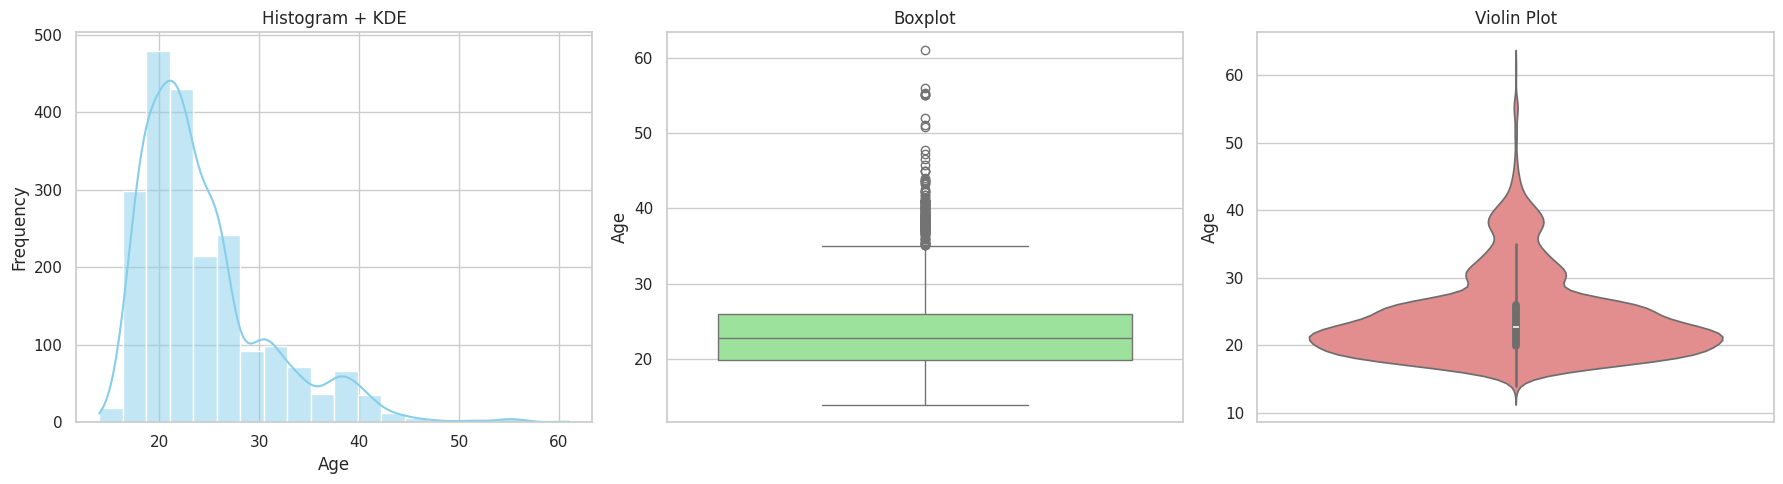

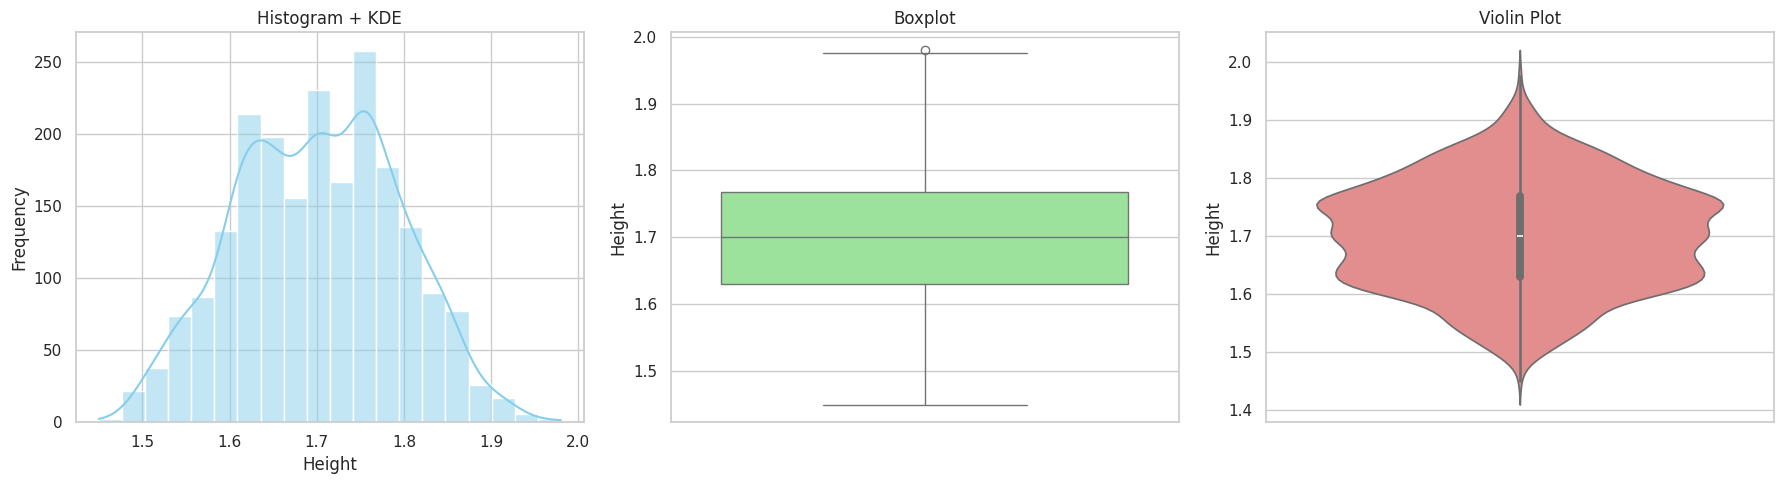

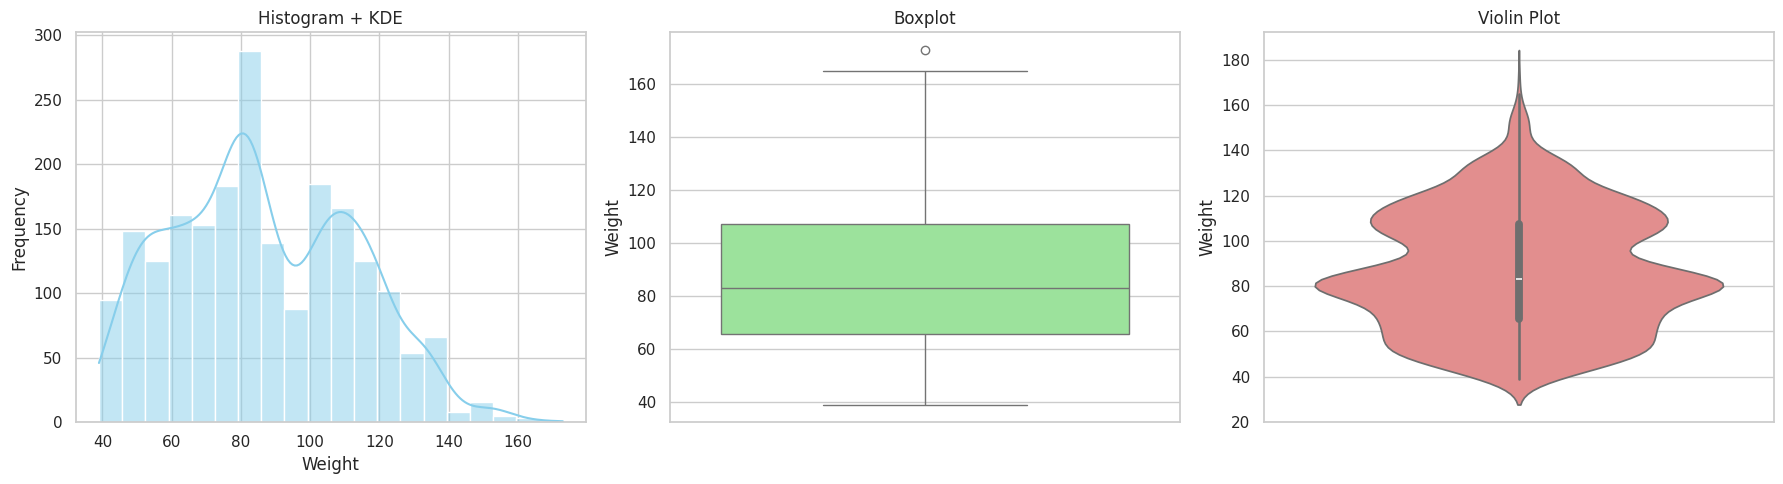

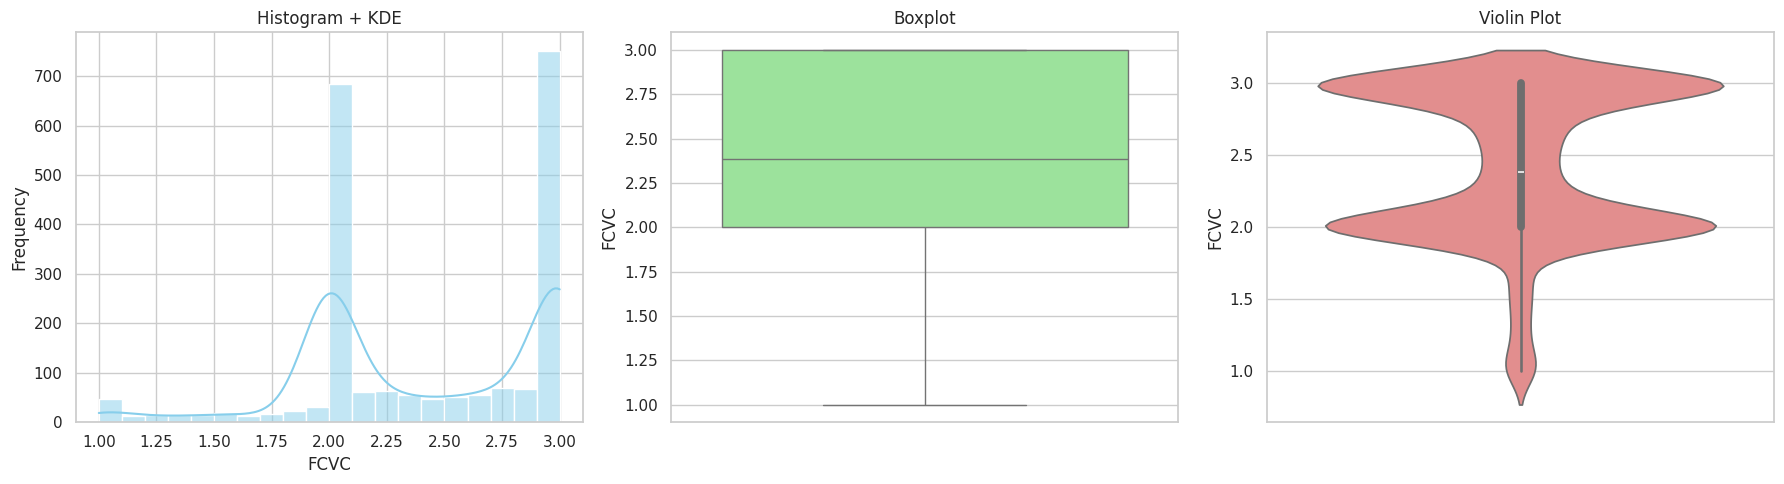

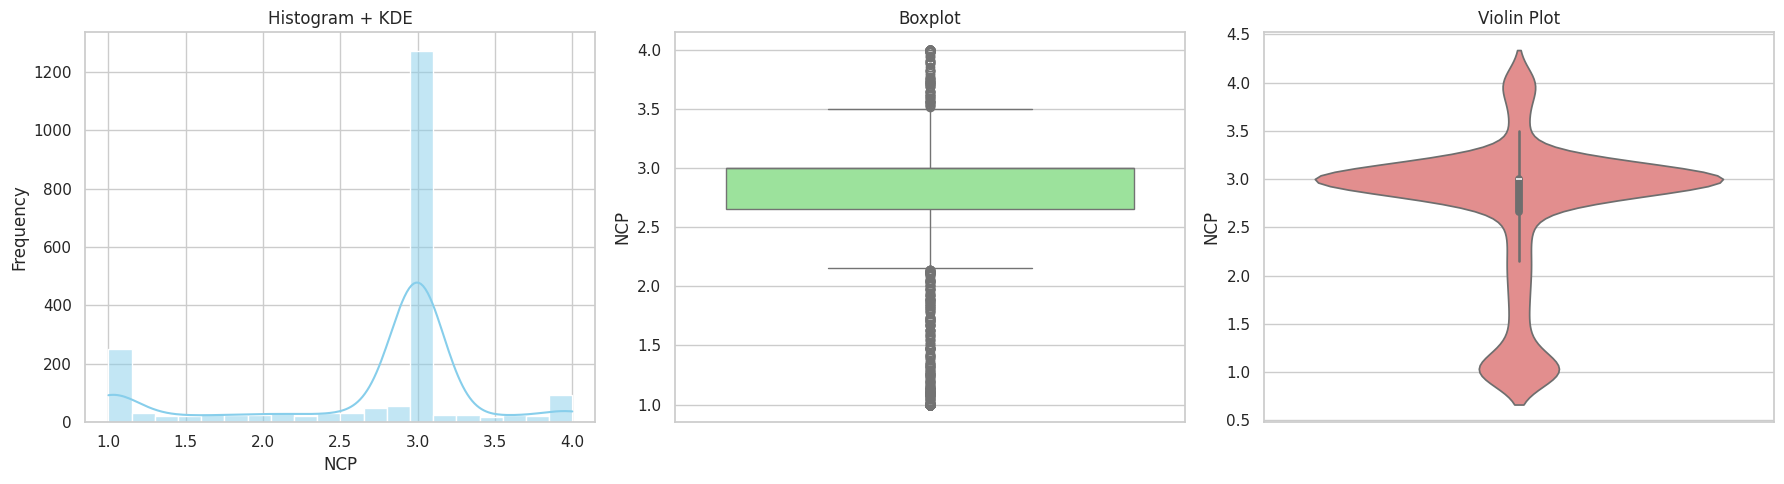

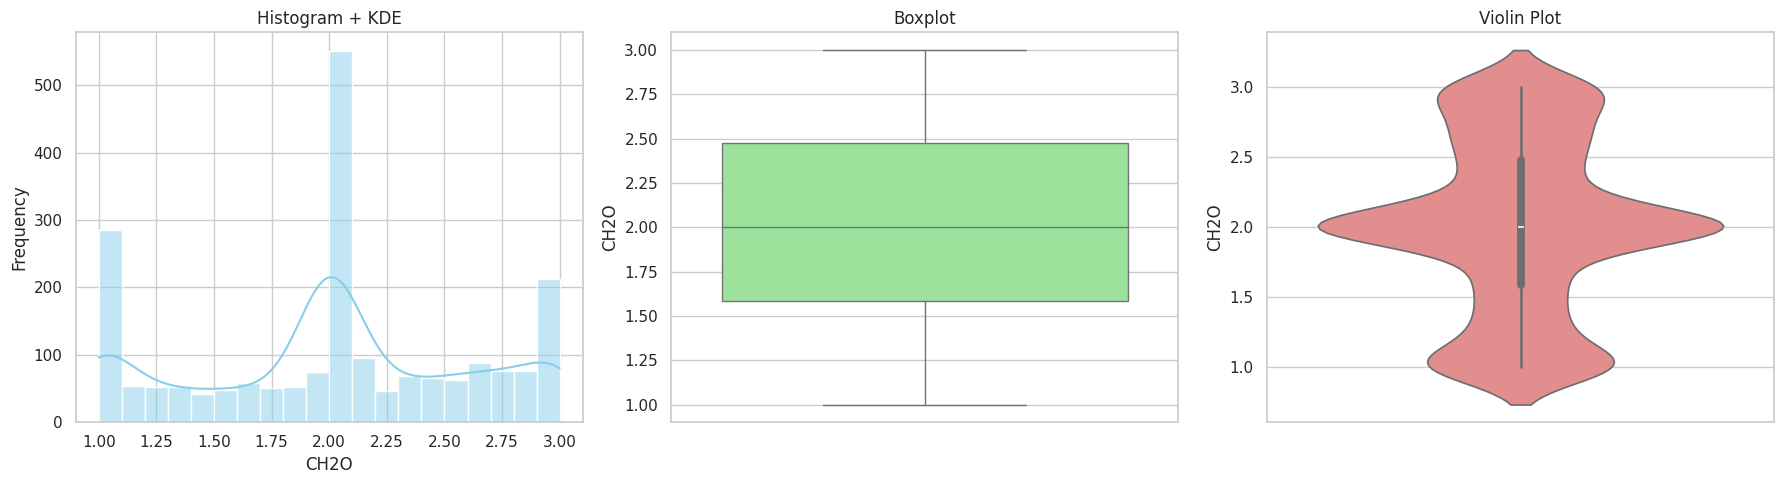

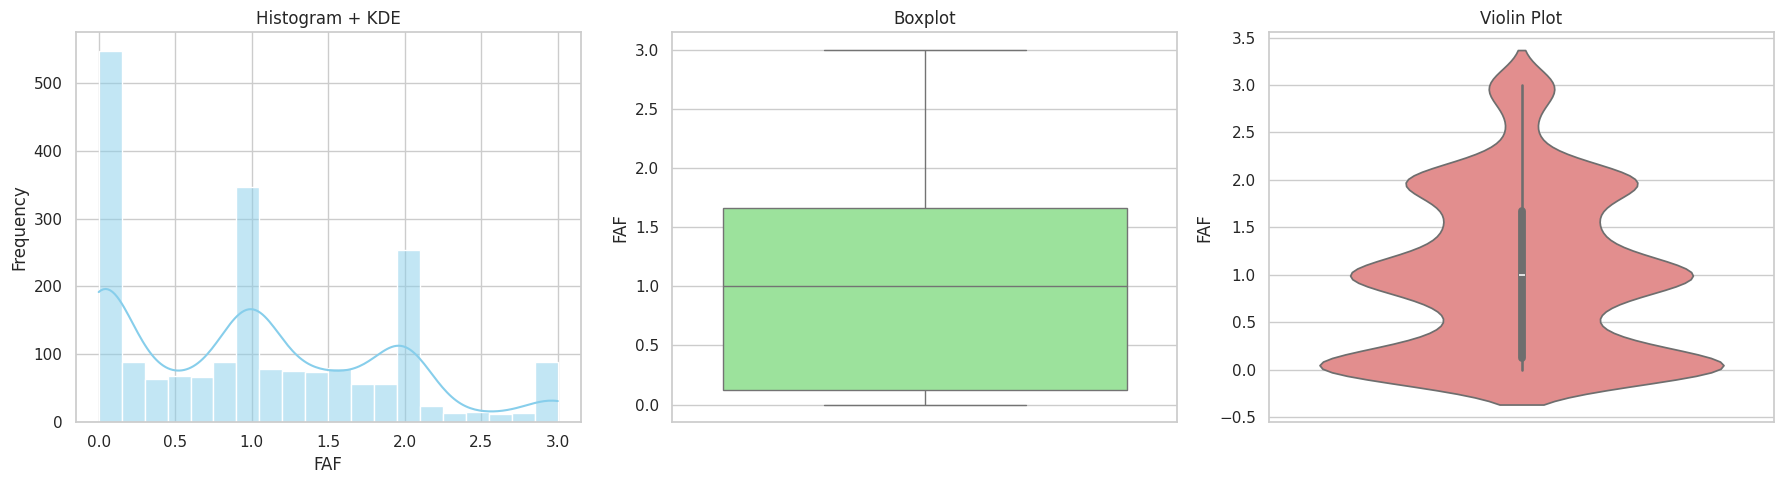

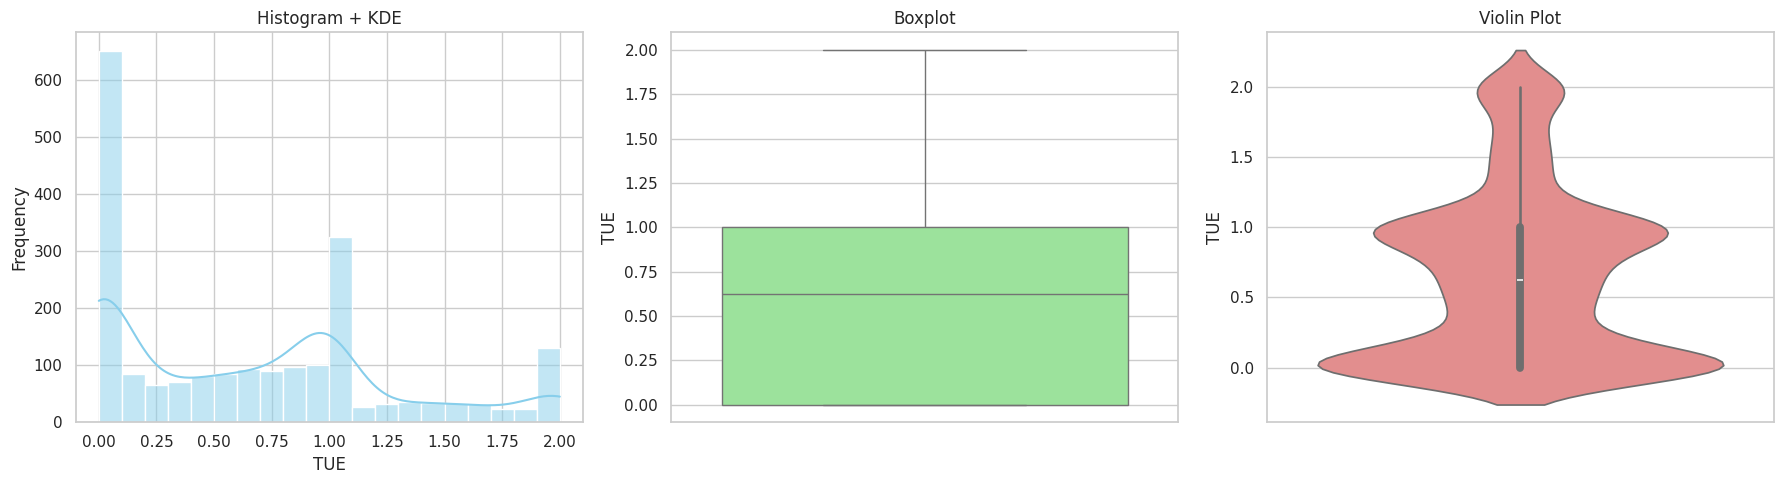

In [132]:
# cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
cols = df_num.columns

for col in cols:
  plot_diagram(col, df_num)

###**Categorical Distribution and Relationship with it's Target**

In [133]:
# ----------------------------
# Categorical
# ----------------------------
def plot_diagram_cat (col, df):
  sns.set(style="whitegrid")

  fig, axes = plt.subplots(1, 3, figsize=(18,5))  # 1 baris, 3 kolom

  # ------------------------------------------
  # 1Tentukan warna untuk tiap kategori
  # ------------------------------------------
  # Misal kolom kategorikal
  counts = df[col].value_counts()
  labels = counts.index
  sizes = counts.values

  colors = sns.color_palette("pastel", len(labels))  # atau custom list: ['skyblue','salmon',...]
  color_dict = dict(zip(labels, colors))

  # ------------------------------------------
  # Bar plot dengan warna sesuai
  # ------------------------------------------
  sns.countplot(x=col, data=df, ax=axes[0],
                palette=color_dict)

  axes[0].set_xlabel(col)
  axes[0].set_ylabel("Count")
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

  # ------------------------------------------
  # 3Pie chart dengan warna sama
  # ------------------------------------------
  explode = [0.01]*len(sizes)

  wedges, texts = axes[1].pie(
      sizes,
      labels=None,
      explode=explode,
      startangle=90,
      shadow=False,
      colors=[color_dict[label] for label in labels]  # warna sama seperti bar plot
  )

  # Legend di bawah
  leg = axes[1].legend(
      wedges,
      [f"{label} ({size/sum(sizes)*100:.1f}%)" for label, size in zip(labels, sizes)],
      title=col,
      loc='upper center',
      bbox_to_anchor=(0.5, -0.05),
      ncol=2,
      prop={'size': 9.5, 'weight':'normal'}
  )

  # Ubah warna teks legend menjadi hitam
  for text in leg.get_texts():
      text.set_color("black")

  axes[1].set_ylabel("")

  # -------------------------------------------------------------
  # Stacked bar / Count plot per target (Gender vs Obesity level)
  # -------------------------------------------------------------

  col_target = 'NObeyesdad'

  # Order obesity level
  order = [
      'Insufficient_Weight',
      'Normal_Weight',
      'Overweight_Level_I',
      'Overweight_Level_II',
      'Obesity_Type_I',
      'Obesity_Type_II',
      'Obesity_Type_III'
  ]

  # Warna berbeda untuk tiap kategori
  colors = ['lightblue','lightgreen','gold','orange','tomato','red','purple']

  # Buat crosstab dan atur kolom sesuai urutan
  crosstab = pd.crosstab(df[col], df[col_target])
  crosstab = crosstab[order]  # urutkan kolom sesuai list

  # Plot stacked bar
  crosstab.plot(kind='bar', stacked=True, ax=axes[2], color=colors)

  # axes[2].set_title("Stacked Bar - Gender vs Obesity Level")
  axes[2].set_xlabel(col)
  axes[2].set_ylabel("Count")
  axes[2].legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # legend di samping

  plt.tight_layout()
  plt.show()

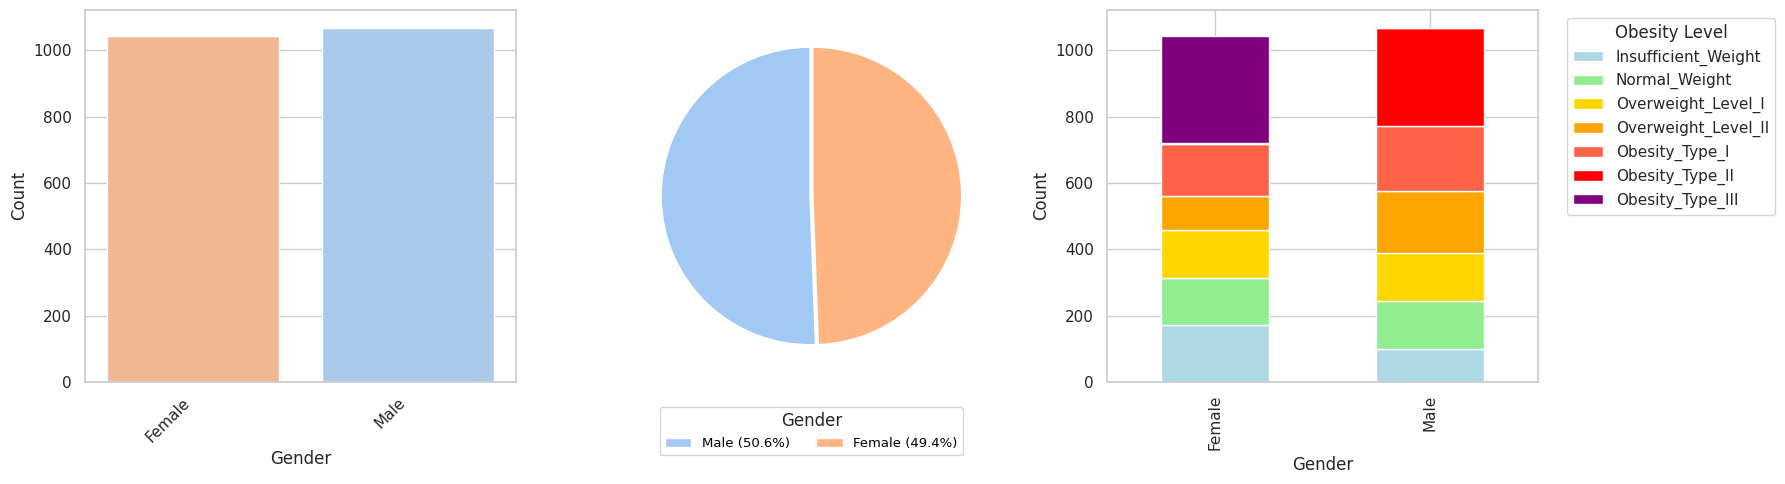

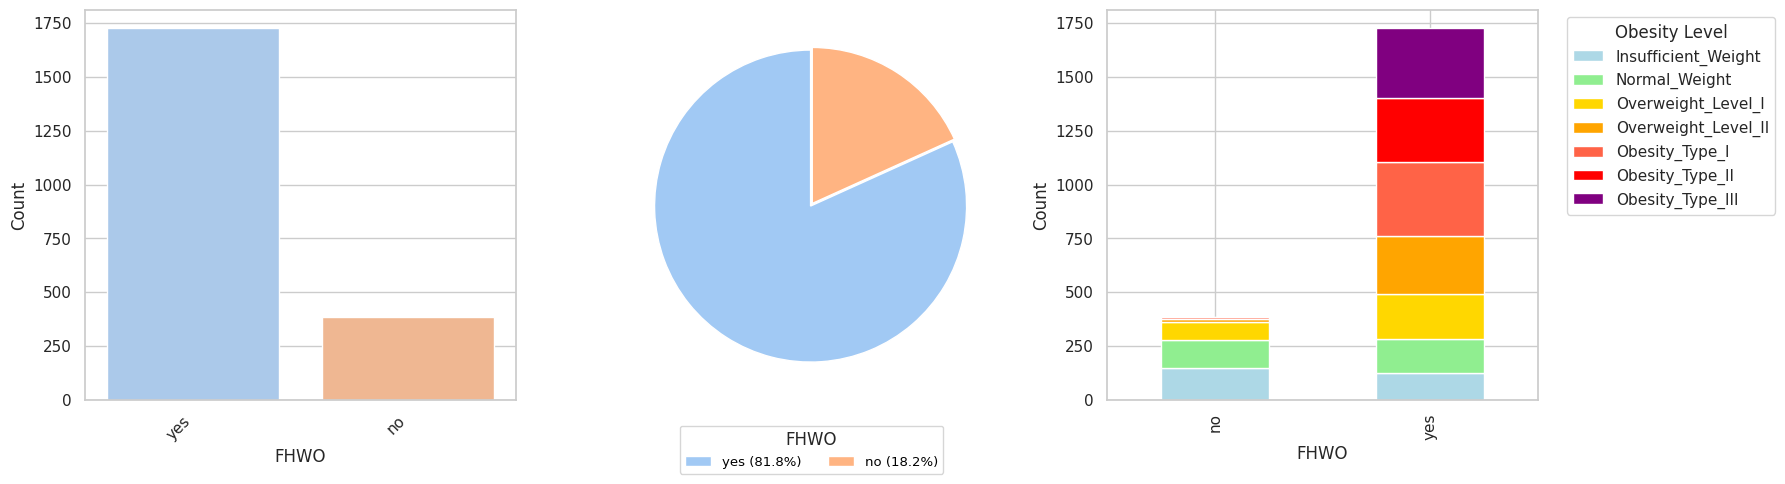

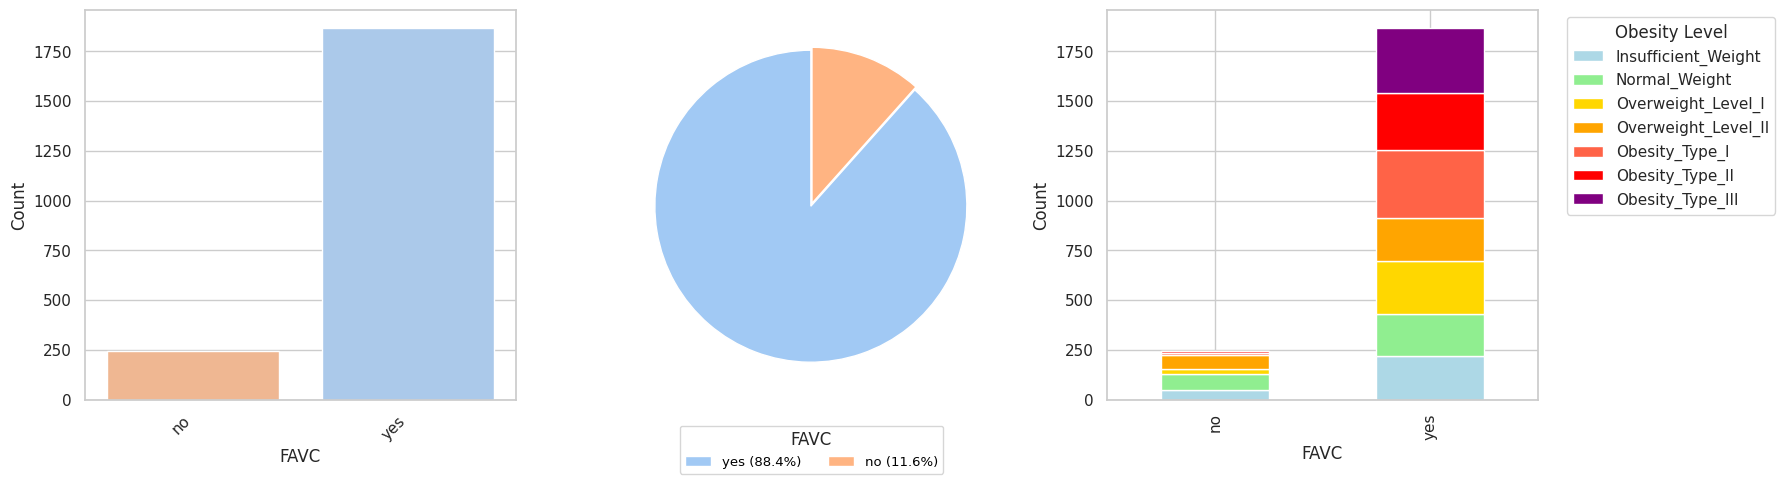

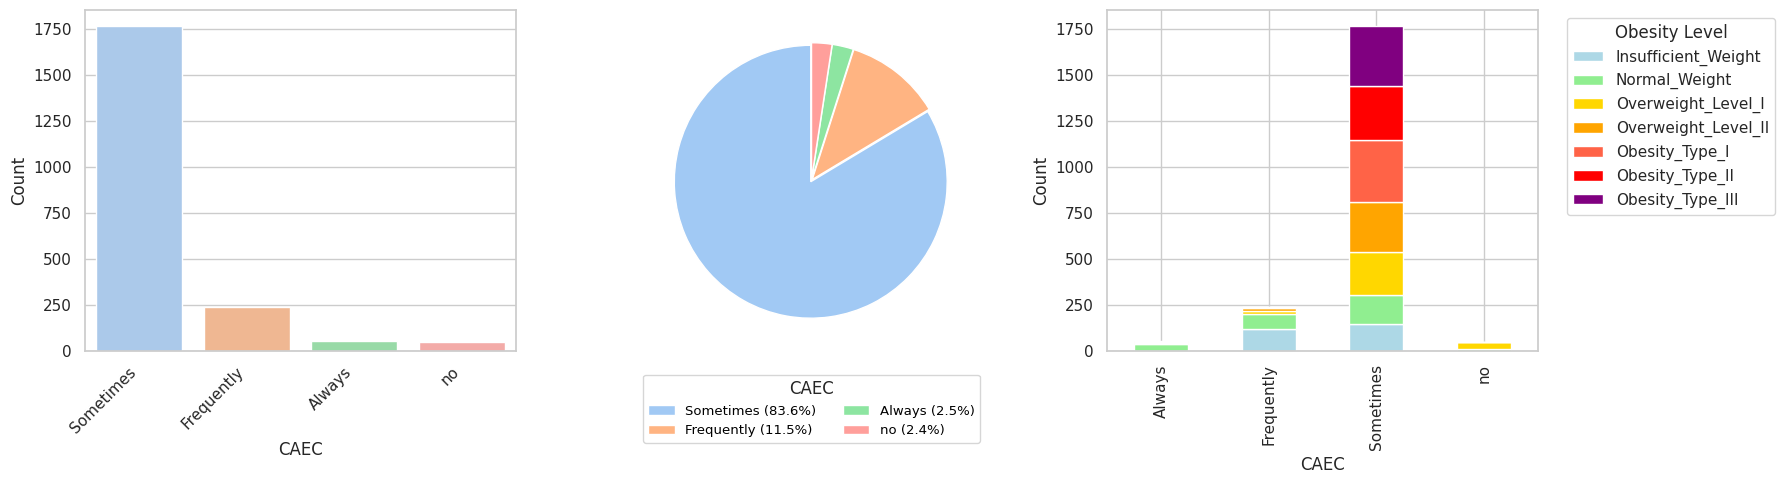

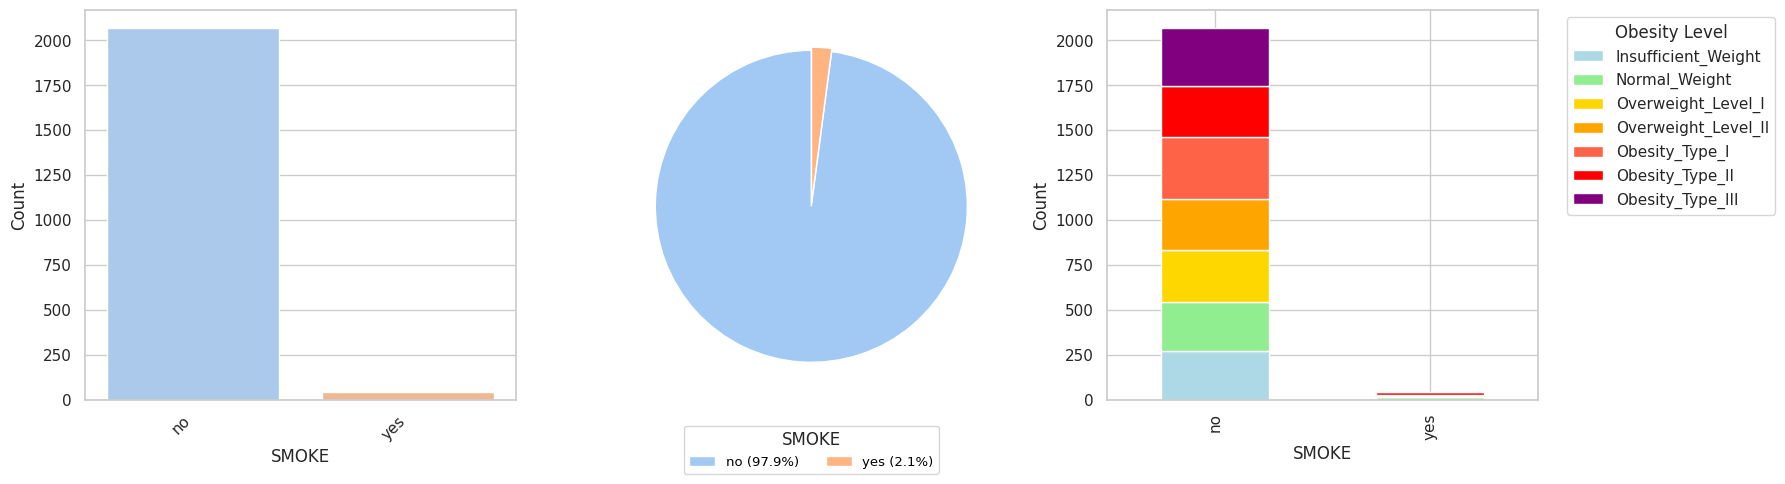

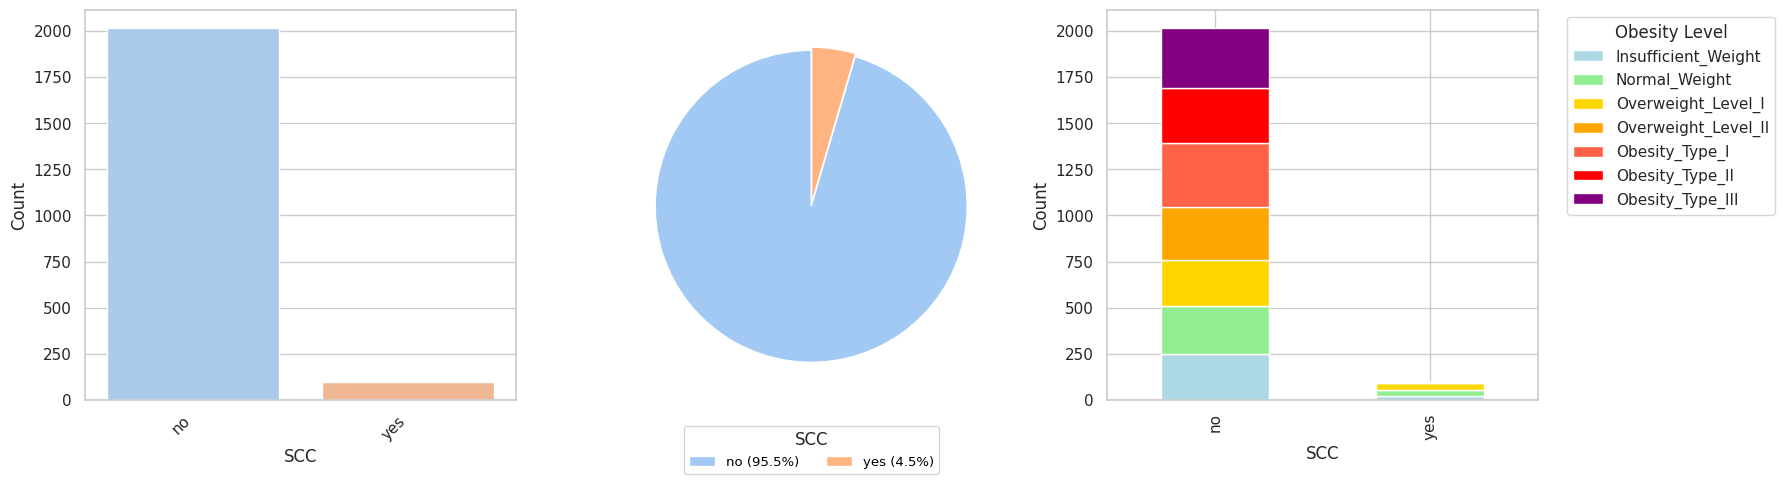

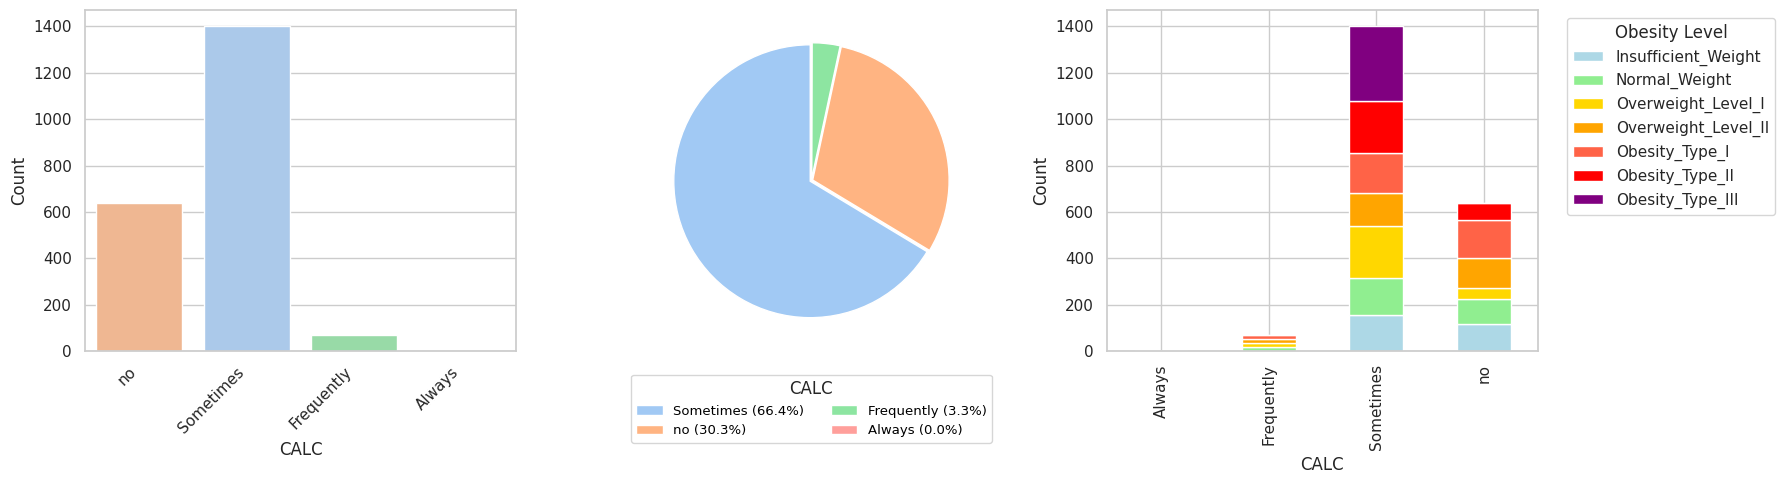

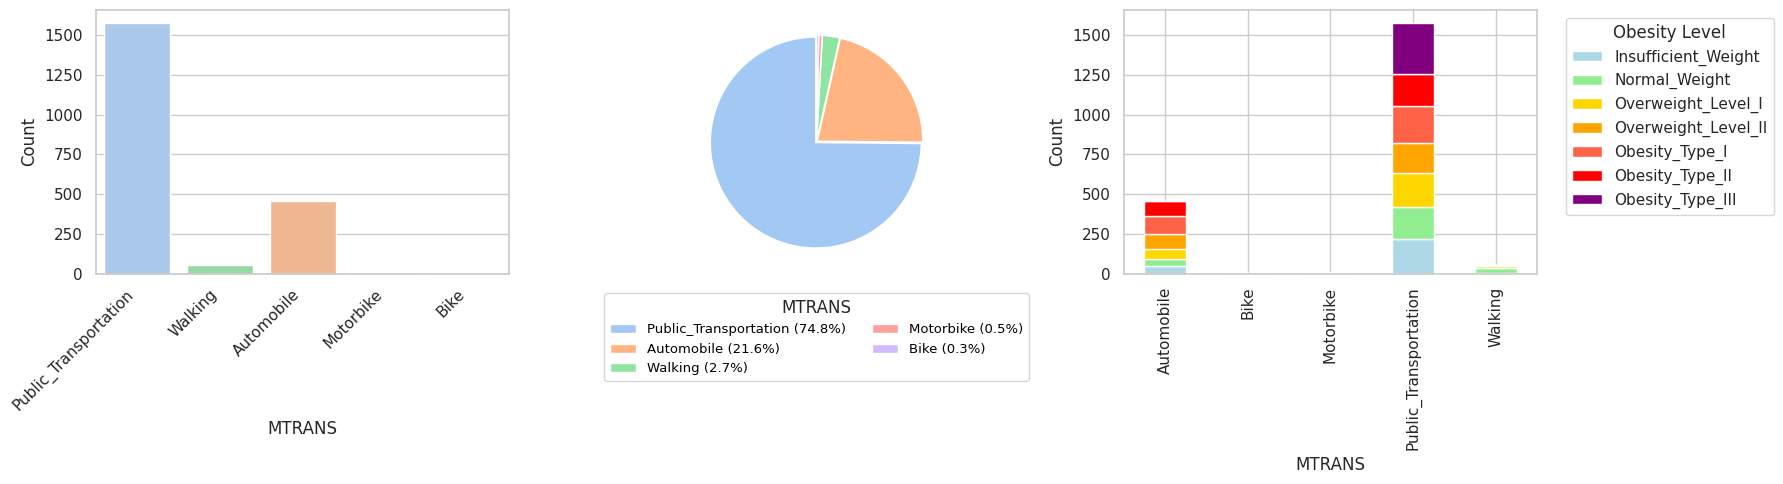

In [134]:
# Plot diagram for all col_cat
cols_cat = [col for col in cols_cat if col != 'NObeyesdad']
for col in cols_cat:
  plot_diagram_cat(col, df)

### Bivariate Analysis (Categorical Features)

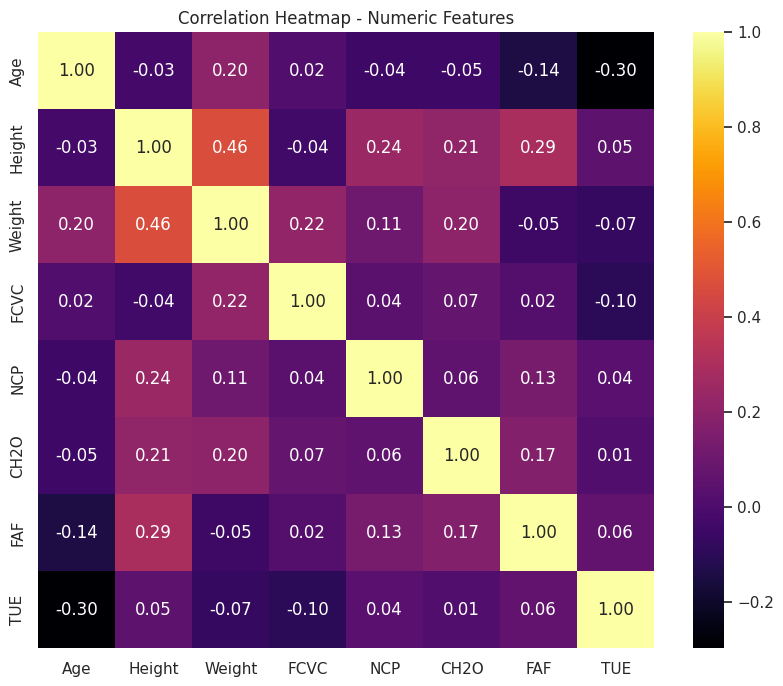

In [135]:
# Pilih hanya kolom numerik
num_cols = df_num.columns

# Hitung correlation matrix
corr = df[num_cols].corr()

# Buat heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="inferno", cbar=True, square=True)
plt.title("Correlation Heatmap - Numeric Features")
plt.show()


Notes:
- There is no indication of multicollinearity.

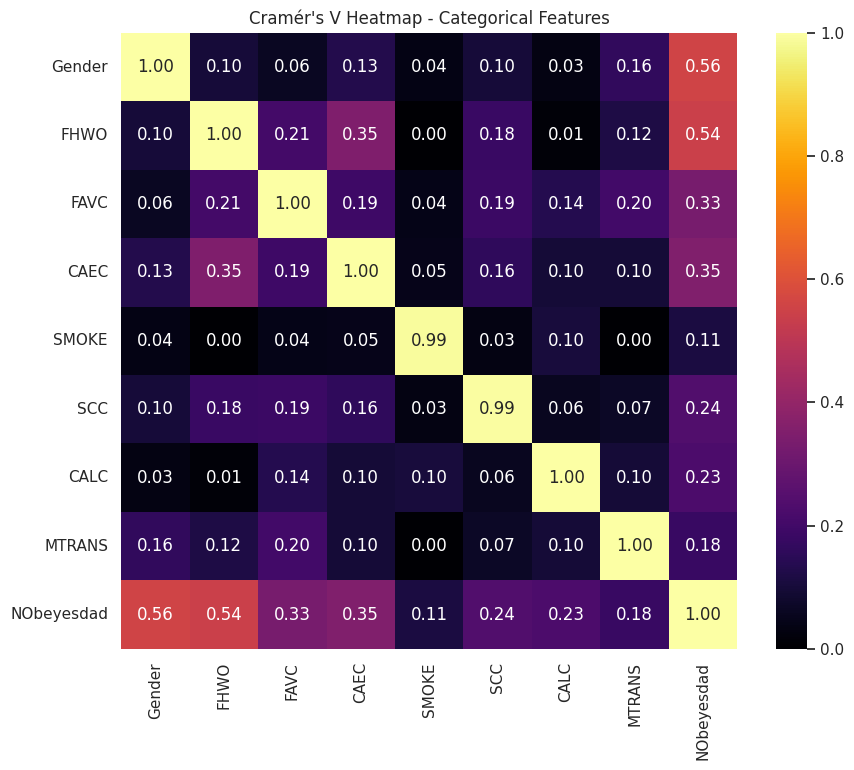

In [136]:
from scipy.stats import chi2_contingency

# -----------------------------------------
# Heatmap Categorical Features (Cramér's V)
# -----------------------------------------
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  # bias correction
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = df_cat.columns

# Matriks Cramér's V
cramers_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_matrix = cramers_matrix.astype(float)

plt.figure(figsize=(10,8))
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap="inferno", square=True)
plt.title("Cramér's V Heatmap - Categorical Features")
plt.show()


**Reference:**
Cramér’s V	| Relationship Category
------------|----------------------
0.00 – 0.20	| Independent / Very Weak → almost no association
0.21 – 0.50	| Moderate → moderate association
0.51 – 0.70	| Strong → fairly strong association
0.71 – 1.00	| Very Strong → very strong / nearly deterministic association

**Notes:**
- No multicollinearity

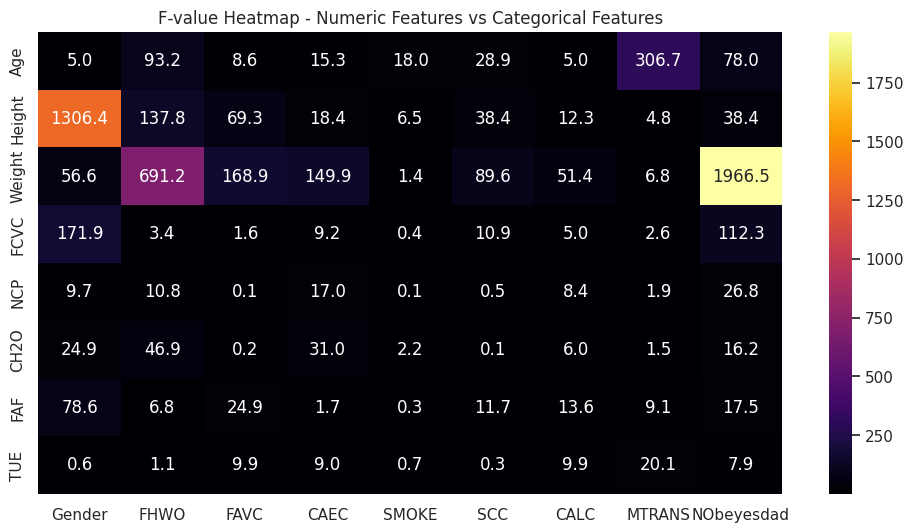

In [137]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik & kategorikal
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include='object').columns

# Matriks F-value
f_matrix = pd.DataFrame(index=numerical_cols, columns=categorical_cols)

for cat_col in categorical_cols:
    y = LabelEncoder().fit_transform(df[cat_col])  # encode target
    X = df[numerical_cols]
    f_vals, p_vals = f_classif(X, y)
    f_matrix[cat_col] = f_vals

f_matrix = f_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(f_matrix, annot=True, fmt=".1f", cmap="inferno", cbar=True)
plt.title("F-value Heatmap - Numeric Features vs Categorical Features")
plt.show()


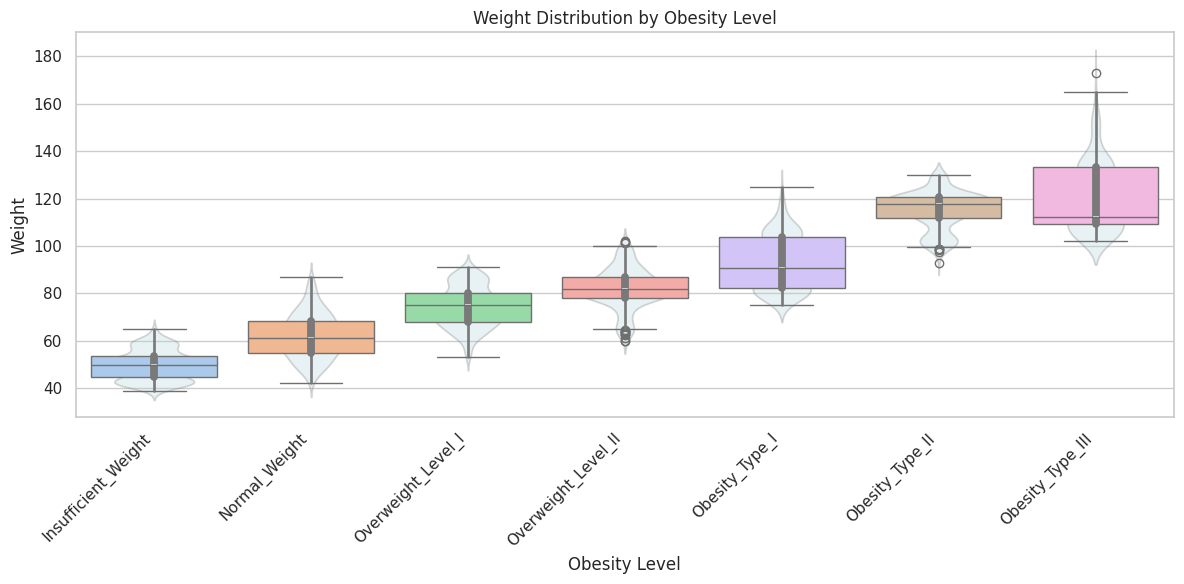

In [138]:
plt.figure(figsize=(12,6))

# Boxplot
sns.boxplot(x='NObeyesdad', y='Weight', data=df, order=[
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
], palette="pastel")

# Violin plot overlay
sns.violinplot(x='NObeyesdad', y='Weight', data=df, order=[
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
], color="lightblue", alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.title("Weight Distribution by Obesity Level")
plt.xlabel("Obesity Level")
plt.ylabel("Weight")
plt.tight_layout()
plt.show()


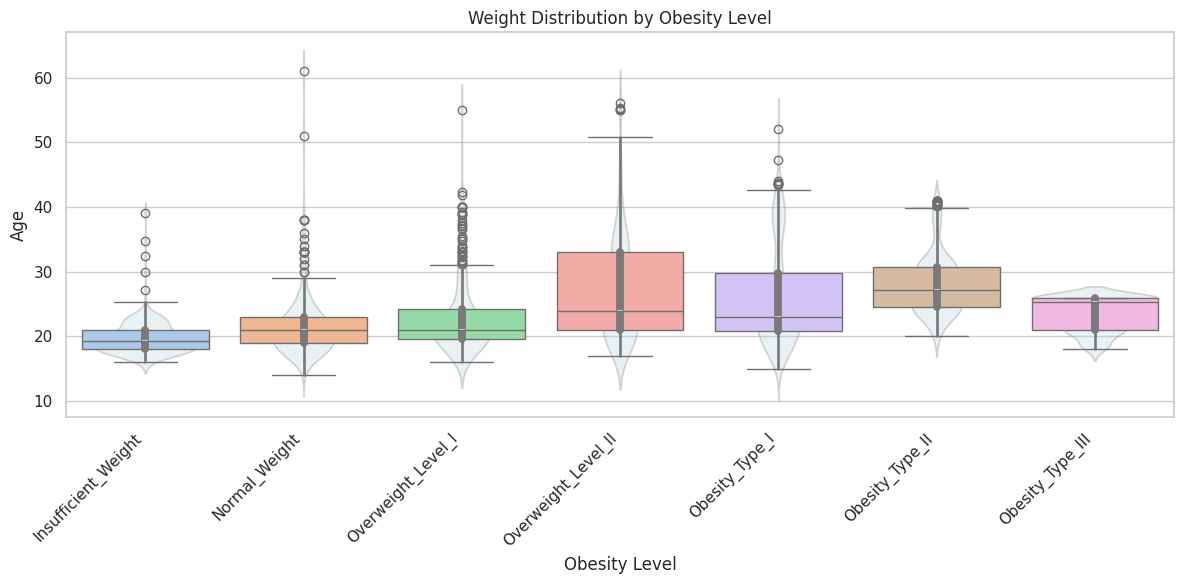

In [139]:
plt.figure(figsize=(12,6))

# Boxplot
sns.boxplot(x='NObeyesdad', y='Age', data=df, order=[
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
], palette="pastel")

# Violin plot overlay
sns.violinplot(x='NObeyesdad', y='Age', data=df, order=[
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
], color="lightblue", alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.title("Weight Distribution by Obesity Level")
plt.xlabel("Obesity Level")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

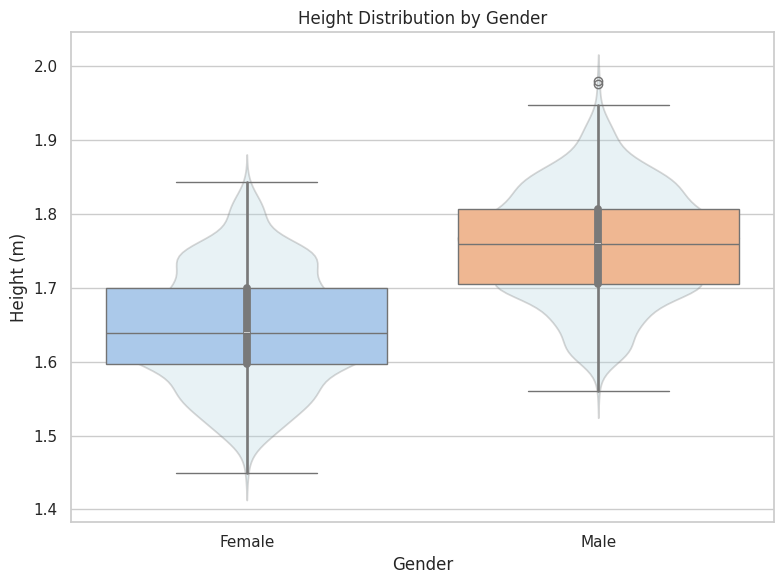

In [140]:
plt.figure(figsize=(8,6))

# Boxplot
sns.boxplot(x='Gender', y='Height', data=df, palette="pastel")

# Violin plot overlay
sns.violinplot(x='Gender', y='Height', data=df, color="lightblue", alpha=0.3)

plt.title("Height Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Height (m)")
plt.tight_layout()
plt.show()


### Check Multicoliearity - VIF Score

Jenis Model |	Cek Multicollinearity? |	Kenapa
------------|------------------------|--------
Linear / Logistic Regression	| ✅ Ya	| Koefisien bisa tidak stabil
Ridge / Lasso |	⚠️ Sebaiknya iya	| Walau ada regularisasi
Tree-based (RF, XGB, CatBoost) |	❌ Tidak perlu	| Tidak terpengaruh korelasi antar fitur
SVM, kNN, NN	| ⚠️ Opsional	| Kadang berpengaruh di jarak / training

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Pilih kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_cols]

# Tambahkan constant (diperlukan untuk VIF)
X_const = add_constant(X)

# Hitung VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

# Hapus constant dari output
vif_data = vif_data[vif_data['Feature'] != 'const']

# Tambahkan rekomendasi
threshold = 5  # bisa ganti 5 atau 10
vif_data['Recommendation'] = vif_data['VIF'].apply(
    lambda x: 'Drop / Check' if x > threshold else 'OK'
)

# Tampilkan hasil
print(vif_data.sort_values(by='VIF', ascending=False))

  Feature       VIF Recommendation
2  Height  1.596997             OK
3  Weight  1.557109             OK
7     FAF  1.197080             OK
1     Age  1.173020             OK
8     TUE  1.110596             OK
4    FCVC  1.102184             OK
6    CH2O  1.089450             OK
5     NCP  1.071537             OK


All VIF < 5 → There is no multicollinearity.

# **Data Prepocessing**

- Handle missing value (isi/ drop) --> tidak ada, tidak ada juga perbaikan tipe data
- Encoding categorical data --> DONE
- Scaling / normalization
- Split train-test --> DONE
- Feature selection --> tidak ada

##Drop duplicate

In [142]:
# Drop duplicate data
df.drop_duplicates(inplace=True)

In [143]:
# Make sure no duplicate data
df[df.duplicated()]

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [144]:
# Data shape after dropping data duplicate
df.shape

(2087, 17)

##Data Splitting

- Split the dataset into training and testing sets using an 80:20 ratio.
- No separate validation set is applied here, as model validation will be performed using cross-validation.

In [145]:
# Split data into train and test with proportio, 80:20
from sklearn.model_selection import train_test_split

X = df.drop(columns='NObeyesdad')
y = df[['NObeyesdad']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
print("Data Train")
print(f"Total rows: {X_train.shape[0]}")
print("--------------------------")
print(X_train.head())
print(y_train.head())
print("==========================\n")
print("Data Train")
print(f"Total rows: {X_test.shape[0]}")
print("--------------------------")
print(X_test.head())
print(y_test.head())
print("==========================")

Data Train
Total rows: 1669
--------------------------
    Gender        Age    Height     Weight FHWO FAVC     FCVC       NCP  \
44    Male  21.000000  1.810000  80.000000   no   no  1.00000  3.000000   
691   Male  18.000000  1.786758  51.524444   no  yes  2.91548  3.000000   
667   Male  22.396504  1.869098  61.411141  yes  yes  3.00000  3.263201   
170   Male  22.000000  1.720000  82.000000   no  yes  2.00000  1.000000   
310   Male  17.000000  1.790000  57.000000  yes  yes  2.00000  4.000000   

           CAEC SMOKE      CH2O SCC       FAF       TUE       CALC  \
44           no    no  2.000000  no  2.000000  0.000000         no   
691   Sometimes    no  1.777486  no  1.077469  1.000000  Sometimes   
667   Sometimes    no  2.233274  no  1.557737  0.000355  Sometimes   
170   Sometimes    no  2.000000  no  2.000000  1.000000  Sometimes   
310  Frequently    no  2.000000  no  2.000000  1.000000         no   

                    MTRANS  
44   Public_Transportation  
691  Public_Tra

##Data Selection

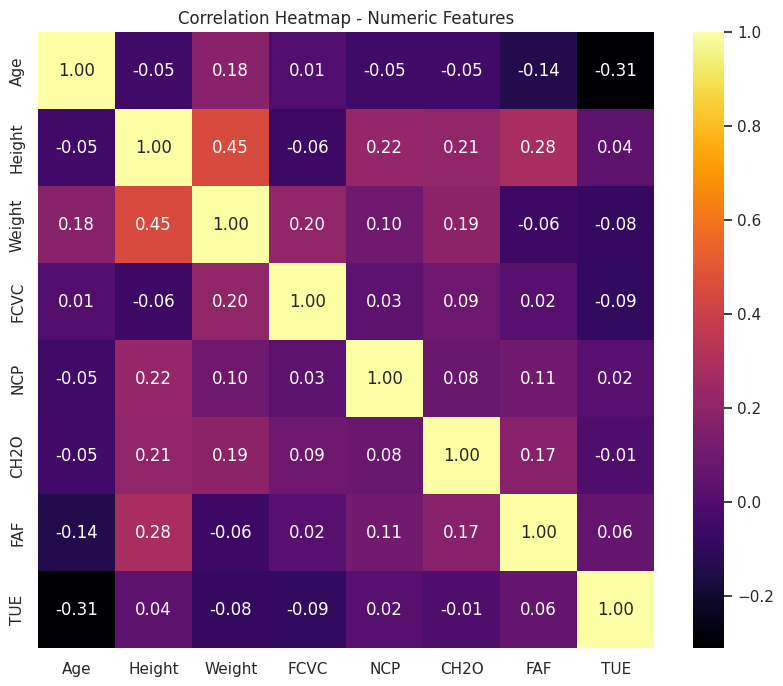

In [162]:
# Pilih hanya kolom numerik
num_cols = df_num.columns

# Hitung correlation matrix
corr = X_train[num_cols].corr()

# Buat heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="inferno", cbar=True, square=True)
plt.title("Correlation Heatmap - Numeric Features")
plt.show()

In [161]:
# Pilih kolom numerik
numerical_cols = df_num.columns
X = X_train[numerical_cols]

# Tambahkan constant (diperlukan untuk VIF)
X_const = add_constant(X)

# Hitung VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

# Hapus constant dari output
vif_data = vif_data[vif_data['Feature'] != 'const']

# Tambahkan rekomendasi
threshold = 5  # bisa ganti 5 atau 10
vif_data['Recommendation'] = vif_data['VIF'].apply(
    lambda x: 'Drop / Check' if x > threshold else 'OK'
)

# Tampilkan hasil
print(vif_data.sort_values(by='VIF', ascending=False))

  Feature       VIF Recommendation
2  Height  1.566243             OK
3  Weight  1.517340             OK
7     FAF  1.189127             OK
1     Age  1.173902             OK
8     TUE  1.118859             OK
4    FCVC  1.104361             OK
6    CH2O  1.089531             OK
5     NCP  1.057054             OK


Notes:
- Following the train–test split, the absence of multicollinearity among numerical features remained consistent with the EDA results.

##Data Encoding

**Data Anaysis:**
Feature | Categorical Type | Encoding | Values
--------|------------------|----------|-------
Gender | 	Nominal | OHE | Male, Female
FHWO | Binary | LO | Yes, No
FAVC | Binary | LO | Yes, No
CAEC | Ordinal | LO/OHE | No → Sometimes → Frequently → Always
SMOKE |	Binary	| LO | Yes, No
SCC	|	Binary	| LO | Yes, No
CALC |	Ordinal | LO/OHE | No → Sometimes → Frequently → Always
MTRANS | Nominal | OHE | Public_Transportation, Automobile,  Motorbike, Bike, Walking
NObeyesdad | Ordinal |	LO | Insufficient_Weight → Normal_Weight → Overweight_Level_I → Overweight_Level_II → Obesity_Type_I → Obesity_Type_II → Obesity_Type_III

Next, two source DataFrames will be created to separately handle the encoding of ordinal categories.


In [147]:
# ============================================
# Label Encoding untuk Binary Features
# ============================================
binary_cols = ['FHWO', 'FAVC', 'SMOKE', 'SCC']
le_binary = LabelEncoder()

for col in binary_cols:
    X_train[col] = le_binary.fit_transform(X_train[col])
    X_test[col] = le_binary.transform(X_test[col])

In [148]:
X_train.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
44,Male,21.000000,1.810000,80.000000,0,0,1.00000,3.000000,no,0,2.000000,0,2.000000,0.000000,no,Public_Transportation
691,Male,18.000000,1.786758,51.524444,0,1,2.91548,3.000000,Sometimes,0,1.777486,0,1.077469,1.000000,Sometimes,Public_Transportation
667,Male,22.396504,1.869098,61.411141,1,1,3.00000,3.263201,Sometimes,0,2.233274,0,1.557737,0.000355,Sometimes,Automobile
170,Male,22.000000,1.720000,82.000000,0,1,2.00000,1.000000,Sometimes,0,2.000000,0,2.000000,1.000000,Sometimes,Public_Transportation
310,Male,17.000000,1.790000,57.000000,1,1,2.00000,4.000000,Frequently,0,2.000000,0,2.000000,1.000000,no,Public_Transportation


In [149]:
X_test.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1337,Female,18.603496,1.681719,90.671871,1,1,1.524428,3.0,Sometimes,0,1.383831,0,0.130417,1.000000,Sometimes,Public_Transportation
1763,Male,31.199261,1.848845,125.077863,1,1,2.496190,3.0,Sometimes,1,1.662117,0,0.992371,0.217632,Sometimes,Public_Transportation
389,Female,16.000000,1.610000,65.000000,1,1,1.000000,1.0,Sometimes,0,2.000000,0,0.000000,0.000000,no,Public_Transportation
595,Male,17.210933,1.819557,58.325122,1,1,2.559600,4.0,Sometimes,0,2.000000,0,2.000000,0.331483,no,Automobile
1735,Male,26.734476,1.816197,119.622764,1,1,2.247037,3.0,Sometimes,0,2.718408,0,0.763595,0.000000,Sometimes,Public_Transportation


In [150]:
# =====================================
# Ordinal Encoding untuk CAEC dan CALC
# =====================================
ordinal_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
for col in ['CAEC', 'CALC']:
    X_train[col] = X_train[col].map(ordinal_map)
    X_test[col] = X_test[col].map(ordinal_map)

In [151]:
X_train.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
44,Male,21.000000,1.810000,80.000000,0,0,1.00000,3.000000,0,0,2.000000,0,2.000000,0.000000,0,Public_Transportation
691,Male,18.000000,1.786758,51.524444,0,1,2.91548,3.000000,1,0,1.777486,0,1.077469,1.000000,1,Public_Transportation
667,Male,22.396504,1.869098,61.411141,1,1,3.00000,3.263201,1,0,2.233274,0,1.557737,0.000355,1,Automobile
170,Male,22.000000,1.720000,82.000000,0,1,2.00000,1.000000,1,0,2.000000,0,2.000000,1.000000,1,Public_Transportation
310,Male,17.000000,1.790000,57.000000,1,1,2.00000,4.000000,2,0,2.000000,0,2.000000,1.000000,0,Public_Transportation


In [152]:
X_train['CAEC'].value_counts(dropna=False)

,count
CAEC,
1,1411
2,188
3,44
0,26


In [153]:
X_test['CAEC'].value_counts(dropna=False)

,count
CAEC,
1,350
2,48
0,11
3,9


In [154]:
# =====================================
# OneHotEncoding untuk Nominal Features
# =====================================
nominal_cols = ['Gender', 'MTRANS']

ohe = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_cols)
    ],
    remainder='passthrough'
)

# Fit-transform di TRAIN
X_train_encoded = ohe.fit_transform(X_train)

# Transform di TEST (tanpa fit ulang)
X_test_encoded = ohe.transform(X_test)

# Konversi ke DataFrame biar rapi
X_train_encoded = pd.DataFrame(
    X_train_encoded,
    columns=ohe.get_feature_names_out()
)
X_test_encoded = pd.DataFrame(
    X_test_encoded,
    columns=ohe.get_feature_names_out()
)

In [155]:
X_train_encoded.head()

,ohe__Gender_Male,ohe__MTRANS_Bike,ohe__MTRANS_Motorbike,ohe__MTRANS_Public_Transportation,ohe__MTRANS_Walking,remainder__Age,remainder__Height,remainder__Weight,remainder__FHWO,remainder__FAVC,remainder__FCVC,remainder__NCP,remainder__CAEC,remainder__SMOKE,remainder__CH2O,remainder__SCC,remainder__FAF,remainder__TUE,remainder__CALC
0,1.0,0.0,0.0,1.0,0.0,21.000000,1.810000,80.000000,0.0,0.0,1.00000,3.000000,0.0,0.0,2.000000,0.0,2.000000,0.000000,0.0
1,1.0,0.0,0.0,1.0,0.0,18.000000,1.786758,51.524444,0.0,1.0,2.91548,3.000000,1.0,0.0,1.777486,0.0,1.077469,1.000000,1.0
2,1.0,0.0,0.0,0.0,0.0,22.396504,1.869098,61.411141,1.0,1.0,3.00000,3.263201,1.0,0.0,2.233274,0.0,1.557737,0.000355,1.0
3,1.0,0.0,0.0,1.0,0.0,22.000000,1.720000,82.000000,0.0,1.0,2.00000,1.000000,1.0,0.0,2.000000,0.0,2.000000,1.000000,1.0
4,1.0,0.0,0.0,1.0,0.0,17.000000,1.790000,57.000000,1.0,1.0,2.00000,4.000000,2.0,0.0,2.000000,0.0,2.000000,1.000000,0.0


In [156]:
X_test_encoded.head()

,ohe__Gender_Male,ohe__MTRANS_Bike,ohe__MTRANS_Motorbike,ohe__MTRANS_Public_Transportation,ohe__MTRANS_Walking,remainder__Age,remainder__Height,remainder__Weight,remainder__FHWO,remainder__FAVC,remainder__FCVC,remainder__NCP,remainder__CAEC,remainder__SMOKE,remainder__CH2O,remainder__SCC,remainder__FAF,remainder__TUE,remainder__CALC
0,0.0,0.0,0.0,1.0,0.0,18.603496,1.681719,90.671871,1.0,1.0,1.524428,3.0,1.0,0.0,1.383831,0.0,0.130417,1.000000,1.0
1,1.0,0.0,0.0,1.0,0.0,31.199261,1.848845,125.077863,1.0,1.0,2.496190,3.0,1.0,1.0,1.662117,0.0,0.992371,0.217632,1.0
2,0.0,0.0,0.0,1.0,0.0,16.000000,1.610000,65.000000,1.0,1.0,1.000000,1.0,1.0,0.0,2.000000,0.0,0.000000,0.000000,0.0
3,1.0,0.0,0.0,0.0,0.0,17.210933,1.819557,58.325122,1.0,1.0,2.559600,4.0,1.0,0.0,2.000000,0.0,2.000000,0.331483,0.0
4,1.0,0.0,0.0,1.0,0.0,26.734476,1.816197,119.622764,1.0,1.0,2.247037,3.0,1.0,0.0,2.718408,0.0,0.763595,0.000000,1.0


In [157]:
# ============================================
# Encode Target (Ordinal)
# ============================================
obesity_order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

y_train = y_train['NObeyesdad'].apply(lambda x: obesity_order.index(x))
y_test = y_test['NObeyesdad'].apply(lambda x: obesity_order.index(x))

In [158]:
y_train.head()

,NObeyesdad
44,1
691,0
667,0
170,3
310,0


In [159]:
y_test.head()

,NObeyesdad
1337,4
1763,5
389,2
595,0
1735,5


In [163]:
# ============================================
# Cek hasil
# ============================================
print("X_train_encoded shape:", X_train_encoded.shape)
print("X_test_encoded shape:", X_test_encoded.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_encoded shape: (1669, 19)
X_test_encoded shape: (418, 19)
y_train shape: (1669,)
y_test shape: (418,)


##Data Scaling

In [165]:
X_train_encoded.head()

,ohe__Gender_Male,ohe__MTRANS_Bike,ohe__MTRANS_Motorbike,ohe__MTRANS_Public_Transportation,ohe__MTRANS_Walking,remainder__Age,remainder__Height,remainder__Weight,remainder__FHWO,remainder__FAVC,remainder__FCVC,remainder__NCP,remainder__CAEC,remainder__SMOKE,remainder__CH2O,remainder__SCC,remainder__FAF,remainder__TUE,remainder__CALC
0,1.0,0.0,0.0,1.0,0.0,21.000000,1.810000,80.000000,0.0,0.0,1.00000,3.000000,0.0,0.0,2.000000,0.0,2.000000,0.000000,0.0
1,1.0,0.0,0.0,1.0,0.0,18.000000,1.786758,51.524444,0.0,1.0,2.91548,3.000000,1.0,0.0,1.777486,0.0,1.077469,1.000000,1.0
2,1.0,0.0,0.0,0.0,0.0,22.396504,1.869098,61.411141,1.0,1.0,3.00000,3.263201,1.0,0.0,2.233274,0.0,1.557737,0.000355,1.0
3,1.0,0.0,0.0,1.0,0.0,22.000000,1.720000,82.000000,0.0,1.0,2.00000,1.000000,1.0,0.0,2.000000,0.0,2.000000,1.000000,1.0
4,1.0,0.0,0.0,1.0,0.0,17.000000,1.790000,57.000000,1.0,1.0,2.00000,4.000000,2.0,0.0,2.000000,0.0,2.000000,1.000000,0.0


In [164]:
X_test_encoded.head()

,ohe__Gender_Male,ohe__MTRANS_Bike,ohe__MTRANS_Motorbike,ohe__MTRANS_Public_Transportation,ohe__MTRANS_Walking,remainder__Age,remainder__Height,remainder__Weight,remainder__FHWO,remainder__FAVC,remainder__FCVC,remainder__NCP,remainder__CAEC,remainder__SMOKE,remainder__CH2O,remainder__SCC,remainder__FAF,remainder__TUE,remainder__CALC
0,0.0,0.0,0.0,1.0,0.0,18.603496,1.681719,90.671871,1.0,1.0,1.524428,3.0,1.0,0.0,1.383831,0.0,0.130417,1.000000,1.0
1,1.0,0.0,0.0,1.0,0.0,31.199261,1.848845,125.077863,1.0,1.0,2.496190,3.0,1.0,1.0,1.662117,0.0,0.992371,0.217632,1.0
2,0.0,0.0,0.0,1.0,0.0,16.000000,1.610000,65.000000,1.0,1.0,1.000000,1.0,1.0,0.0,2.000000,0.0,0.000000,0.000000,0.0
3,1.0,0.0,0.0,0.0,0.0,17.210933,1.819557,58.325122,1.0,1.0,2.559600,4.0,1.0,0.0,2.000000,0.0,2.000000,0.331483,0.0
4,1.0,0.0,0.0,1.0,0.0,26.734476,1.816197,119.622764,1.0,1.0,2.247037,3.0,1.0,0.0,2.718408,0.0,0.763595,0.000000,1.0


In [166]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit hanya di training data
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Apply scaling ke test data
X_test_scaled = scaler.transform(X_test_encoded)


In [168]:
X_train_scaled

array([[ 0.98159534, -0.05481613, -0.06940011, ...,  1.15273428,
        -1.09030512, -1.42960449],
       [ 0.98159534, -0.05481613, -0.06940011, ...,  0.06763666,
         0.56104507,  0.51024095],
       [ 0.98159534, -0.05481613, -0.06940011, ...,  0.63253655,
        -1.08971889,  0.51024095],
       ...,
       [ 0.98159534, -0.05481613, -0.06940011, ..., -1.19970183,
         1.1650974 ,  0.51024095],
       [ 0.98159534, -0.05481613, -0.06940011, ...,  1.65841747,
         2.17613655, -1.42960449],
       [-1.01874974, -0.05481613, -0.06940011, ..., -0.98918703,
        -0.81605549,  0.51024095]])

In [169]:
X_test_scaled

array([[-1.01874974, -0.05481613, -0.06940011, ..., -1.046303  ,
         0.56104507,  0.51024095],
       [ 0.98159534, -0.05481613, -0.06940011, ..., -0.03245714,
        -0.73091848,  0.51024095],
       [-1.01874974, -0.05481613, -0.06940011, ..., -1.19970183,
        -1.09030512, -1.42960449],
       ...,
       [ 0.98159534, -0.05481613, -0.06940011, ...,  0.36646309,
        -1.00287934,  0.51024095],
       [ 0.98159534, -0.05481613, -0.06940011, ...,  0.76336023,
        -1.09030512, -1.42960449],
       [-1.01874974, -0.05481613, -0.06940011, ...,  1.15273428,
        -1.09030512, -1.42960449]])

# **Modeling**

Models will be applied ini this project.
Type | Model | Scaling | Characteristics
-----|-------|---------|----------------
Baseline | Logistic Regression (multinomial mode) | Standard | Cepat, stabil, tapi tidak memperhitungkan urutan kategori.
Candidate | Ordinal Logistic Regression (Proportional Odds Model) | Standard | (1) Paling klasik dan interpretatif. (2) Cocok kalau datanya terukur dan kita pengen tahu apa faktor paling signifikan mempengaruhi tingkat obesitas.
Pembanding | Ordinal Ridge / Lasso Regression (dari mord) | ? | (1) Mirip dengan logistic ordinal, tapi punya regularisasi (L1/L2) supaya lebih stabil kalau banyak fitur. (2) Bagus buat dataset menengah–besar.
Tree-based | Random Forest Classifier | no need | (1) Kuat dan nonlinier, bisa menangkap interaksi fitur. (2) Cocok kalau hubungan fitur ↔ obesitas kompleks.
x | Gradient Boosting (XGBoost / LightGBM / CatBoost) | no need | (1)Biasanya paling kuat performanya. (2) CatBoostClassifier malah bisa otomatis handle data kategorikal. (3) Bisa di-tune untuk output ordinal dengan strategi custom (misal dengan ordinal loss function).


Kriteria	| Pertimbangan
----------|-------------
Kinerja (Performance)	| Akurasi, F1, ROC-AUC, Cohen’s Kappa, dsb
Interpretabilitas	| Bisa menjelaskan hubungan fitur ↔ target?
Kompleksitas model	| Seberapa berat komputasinya? (runtime, RAM, CPU)
Konsistensi hasil	| Stabil di cross-validation, tidak overfit
Kebutuhan bisnis / penelitian	| Fokus pada akurasi tinggi atau pemahaman faktor risiko?

### **Baseline model**

#### Logistic Regression

✅ Test Accuracy: 0.8684

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        59
           1       0.87      0.67      0.76        61
           2       0.70      0.73      0.71        55
           3       0.70      0.80      0.74        49
           4       0.93      0.90      0.91        70
           5       0.97      1.00      0.98        64
           6       1.00      1.00      1.00        60

    accuracy                           0.87       418
   macro avg       0.86      0.86      0.86       418
weighted avg       0.87      0.87      0.87       418



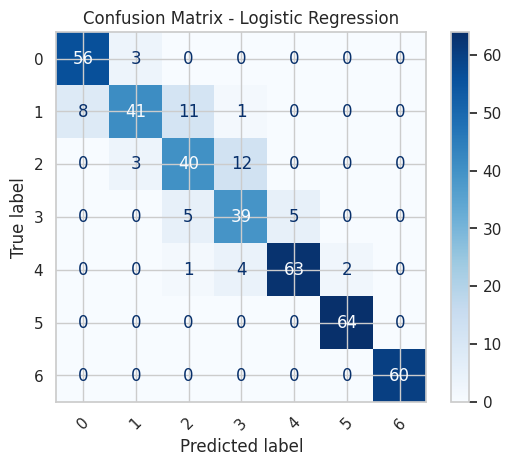

📈 Cross-validation accuracy: 0.8610 ± 0.0160

🔍 Top influential features:
                              Feature  Coefficient
7                   remainder__Weight     6.205324
6                   remainder__Height     1.641516
0                    ohe__Gender_Male     0.862415
10                    remainder__FCVC     0.569027
5                      remainder__Age     0.484959
8                     remainder__FHWO     0.397414
9                     remainder__FAVC     0.339960
11                     remainder__NCP     0.299044
18                    remainder__CALC     0.269359
3   ohe__MTRANS_Public_Transportation     0.263627


In [170]:
# ================================================
# 📦 1. Import Library
# ================================================
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt

# ================================================
# ⚙️ 2. Data Input
# ================================================
# Asumsikan kamu sudah punya data hasil preprocessing
# X_train_scaled, X_test_scaled, y_train, y_test

# Kalau y_train/y_test masih DataFrame, ubah ke Series
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# ================================================
# 🧠 3. Inisialisasi Model
# ================================================
logreg = LogisticRegression(
    multi_class='multinomial',  # karena target-nya multi-class (bukan binary)
    solver='lbfgs',             # solver stabil untuk dataset dengan ukuran menengah
    max_iter=1000,              # iterasi lebih tinggi biar konvergen
    random_state=42
)

# ================================================
# 🚀 4. Training Model
# ================================================
logreg.fit(X_train_scaled, y_train)

# ================================================
# 🔍 5. Evaluasi pada Data Test
# ================================================
y_pred = logreg.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {acc:.4f}\n")

# Classification report (precision, recall, F1 per kelas)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ================================================
# 🔁 6. Cross Validation (Opsional)
# ================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print(f"📈 Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ================================================
# 🧩 7. Interpretasi Koefisien (Opsional)
# ================================================
coefficients = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Coefficient': np.mean(np.abs(logreg.coef_), axis=0)
}).sort_values(by='Coefficient', ascending=False)

print("\n🔍 Top influential features:")
print(coefficients.head(10))


### **Candidate**

####Ordinal Logistic Regression

In [173]:
# !pip install mord

✅ Test Accuracy (Ordinal Logistic Regression): 0.9091

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        59
           1       0.85      0.87      0.86        61
           2       0.89      0.87      0.88        55
           3       0.88      0.92      0.90        49
           4       1.00      0.99      0.99        70
           5       0.92      0.91      0.91        64
           6       0.90      0.93      0.92        60

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.91      0.91      0.91       418



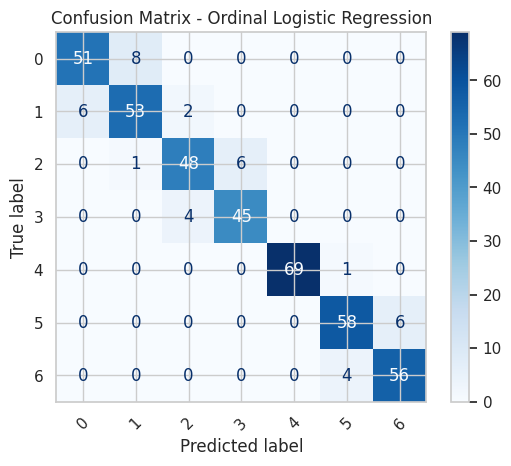

📈 Cross-validation accuracy: 0.8993 ± 0.0096

🔍 Top influential features (positive → higher obesity level):
                              Feature  Coefficient
7                   remainder__Weight    15.007698
3   ohe__MTRANS_Public_Transportation     0.473873
8                     remainder__FHWO     0.354951
5                      remainder__Age     0.272506
10                    remainder__FCVC     0.164632
11                     remainder__NCP     0.160229
1                    ohe__MTRANS_Bike     0.110007
4                 ohe__MTRANS_Walking     0.082495
2               ohe__MTRANS_Motorbike     0.049364
9                     remainder__FAVC     0.047849

🔍 Least influential features (negative → lower obesity level):
              Feature  Coefficient
9     remainder__FAVC     0.047849
17     remainder__TUE     0.014966
15     remainder__SCC    -0.026170
13   remainder__SMOKE    -0.072150
18    remainder__CALC    -0.076915
16     remainder__FAF    -0.131259
14    remainder__CH2O 

In [174]:
# ================================================
# 📦 1. Import Library
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mord import LogisticAT  # Additive Threshold model (Ordinal Logistic Regression)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import StratifiedKFold, cross_val_score

# ================================================
# ⚙️ 2. Data Input
# ================================================
# Asumsikan kamu sudah punya data hasil preprocessing:
# X_train_scaled, X_test_scaled, y_train, y_test

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# ================================================
# 🧠 3. Inisialisasi Model
# ================================================
# LogisticAT = Additive Threshold (Ordinal Logistic Regression)
ord_model = LogisticAT(alpha=1.0)  # alpha = regulasi (seperti C di LogisticRegression)

# ================================================
# 🚀 4. Training Model
# ================================================
ord_model.fit(X_train_scaled, y_train)

# ================================================
# 🔍 5. Evaluasi pada Data Test
# ================================================
y_pred = ord_model.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy (Ordinal Logistic Regression): {acc:.4f}\n")

# Classification report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Ordinal Logistic Regression")
plt.show()

# ================================================
# 🔁 6. Cross Validation
# ================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(ord_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print(f"📈 Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ================================================
# 🧩 7. Interpretasi Koefisien
# ================================================
coefficients = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Coefficient': ord_model.coef_.flatten()
}).sort_values(by='Coefficient', ascending=False)

print("\n🔍 Top influential features (positive → higher obesity level):")
print(coefficients.head(10))
print("\n🔍 Least influential features (negative → lower obesity level):")
print(coefficients.tail(10))


### **Competitor**

####Random Forest

✅ Test Accuracy (Random Forest): 0.9593

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        59
           1       0.84      0.97      0.90        61
           2       0.98      0.89      0.93        55
           3       0.92      0.96      0.94        49
           4       1.00      0.97      0.99        70
           5       1.00      1.00      1.00        64
           6       1.00      1.00      1.00        60

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



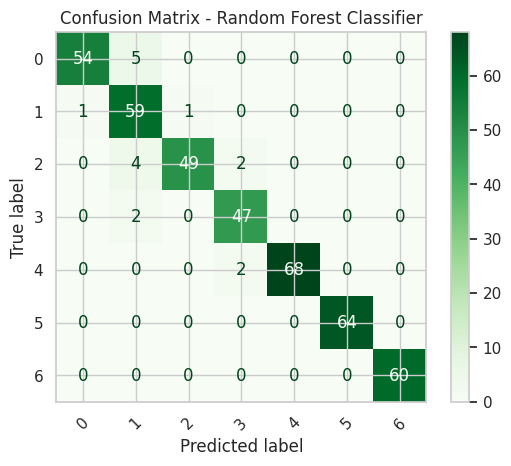

📈 Cross-validation accuracy: 0.9467 ± 0.0097

🔥 Top 10 Most Important Features:
              Feature  Importance
7   remainder__Weight    0.326393
6   remainder__Height    0.102648
5      remainder__Age    0.096815
10    remainder__FCVC    0.088639
0    ohe__Gender_Male    0.055122
11     remainder__NCP    0.054001
17     remainder__TUE    0.047259
16     remainder__FAF    0.044304
14    remainder__CH2O    0.043577
8     remainder__FHWO    0.031669


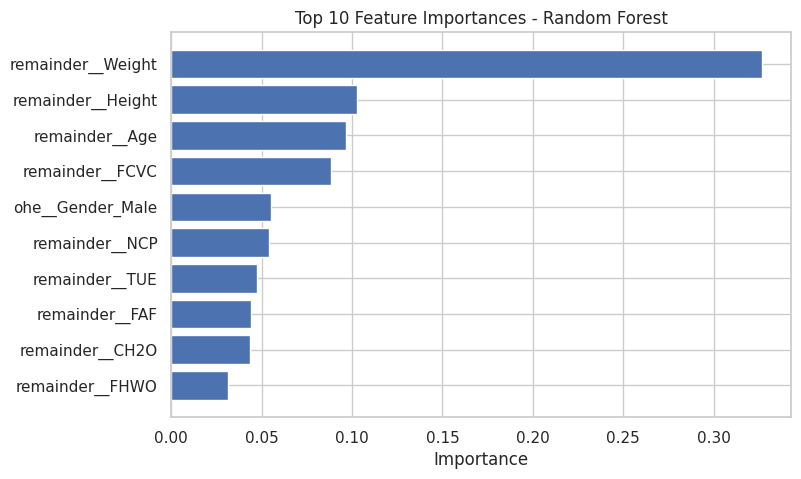

In [175]:
# ================================================
# 📦 1. Import Library
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import StratifiedKFold, cross_val_score

# ================================================
# ⚙️ 2. Data Input
# ================================================
# Gunakan dataset hasil encoding (tanpa scaling)
# X_train_encoded, X_test_encoded, y_train, y_test

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# ================================================
# 🌳 3. Inisialisasi Model
# ================================================
rf = RandomForestClassifier(
    n_estimators=200,       # jumlah pohon
    max_depth=None,         # biarkan otomatis menyesuaikan
    min_samples_split=2,    # default
    min_samples_leaf=1,     # default
    random_state=42,
    n_jobs=-1               # gunakan semua core CPU
)

# ================================================
# 🚀 4. Training Model
# ================================================
rf.fit(X_train_encoded, y_train)

# ================================================
# 🔍 5. Evaluasi pada Data Test
# ================================================
y_pred = rf.predict(X_test_encoded)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy (Random Forest): {acc:.4f}\n")

# Classification report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens', xticks_rotation=45)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

# ================================================
# 🔁 6. Cross Validation
# ================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X_train_encoded, y_train, cv=cv, scoring='accuracy')

print(f"📈 Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ================================================
# 🌟 7. Feature Importance
# ================================================
importances = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔥 Top 10 Most Important Features:")
print(importances.head(10))

# Visualisasi Feature Importance
plt.figure(figsize=(8,5))
plt.barh(importances['Feature'].head(10), importances['Importance'].head(10))
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.show()

####XGBoost Classifier

✅ Test Accuracy (XGBoost): 0.9737

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.92      0.92      0.92        61
           2       0.95      0.95      0.95        55
           3       0.98      1.00      0.99        49
           4       1.00      0.99      0.99        70
           5       1.00      1.00      1.00        64
           6       1.00      1.00      1.00        60

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



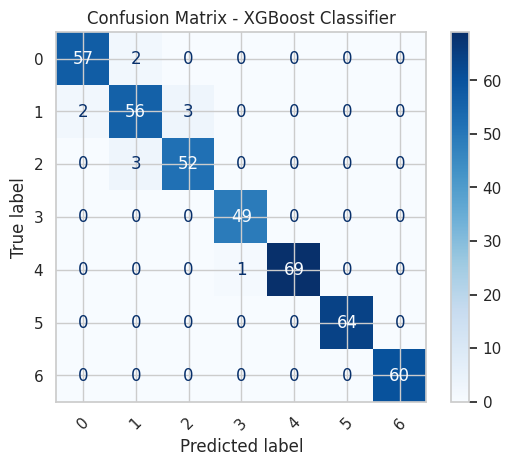

📈 Cross-validation accuracy: 0.9670 ± 0.0027

🔥 Top 10 Most Important Features:
                Feature  Importance
0      ohe__Gender_Male    0.163378
7     remainder__Weight    0.147184
10      remainder__FCVC    0.123040
9       remainder__FAVC    0.067683
12      remainder__CAEC    0.055502
18      remainder__CALC    0.050595
6     remainder__Height    0.049285
8       remainder__FHWO    0.047468
11       remainder__NCP    0.044443
4   ohe__MTRANS_Walking    0.041709


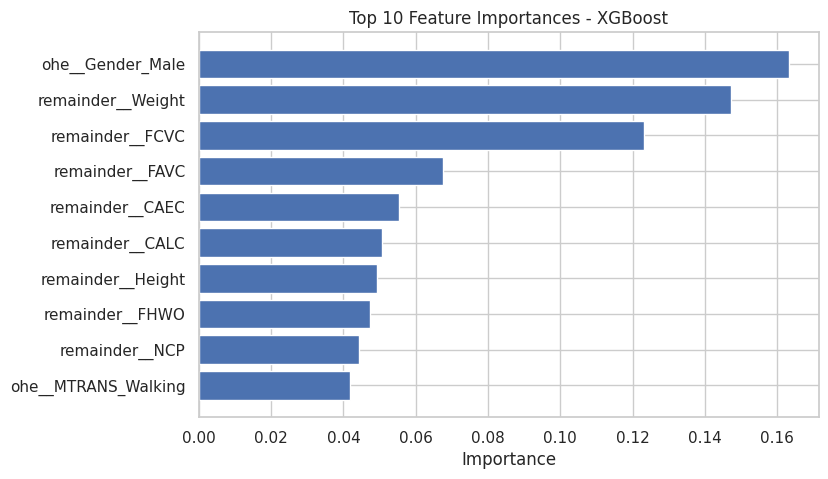

In [176]:
# ================================================
# 📦 1. Import Library
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import StratifiedKFold, cross_val_score

# ================================================
# ⚙️ 2. Data Input
# ================================================
# Gunakan dataset hasil encoding (tanpa scaling)
# X_train_encoded, X_test_encoded, y_train, y_test

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# ================================================
# 🌳 3. Inisialisasi Model
# ================================================
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_jobs=-1
)

# ================================================
# 🚀 4. Training Model
# ================================================
xgb.fit(X_train_encoded, y_train)

# ================================================
# 🔍 5. Evaluasi pada Data Test
# ================================================
y_pred = xgb.predict(X_test_encoded)

acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy (XGBoost): {acc:.4f}\n")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()

# ================================================
# 🔁 6. Cross Validation
# ================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb, X_train_encoded, y_train, cv=cv, scoring='accuracy')

print(f"📈 Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ================================================
# 🌟 7. Feature Importance
# ================================================
importances = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔥 Top 10 Most Important Features:")
print(importances.head(10))

plt.figure(figsize=(8,5))
plt.barh(importances['Feature'].head(10), importances['Importance'].head(10))
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances - XGBoost')
plt.xlabel('Importance')
plt.show()


####LightGBM Classifier

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2062
[LightGBM] [Info] Number of data points in the train set: 1669, number of used features: 17
[LightGBM] [Info] Start training from score -2.082442
[LightGBM] [Info] Start training from score -2.021817
[LightGBM] [Info] Start training from score -2.021817
[LightGBM] [Info] Start training from score -1.935183
[LightGBM] [Info] Start training from score -1.781625
[LightGBM] [Info] Start training from score -1.968941
[LightGBM] [Info] Start training from score -1.844031
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

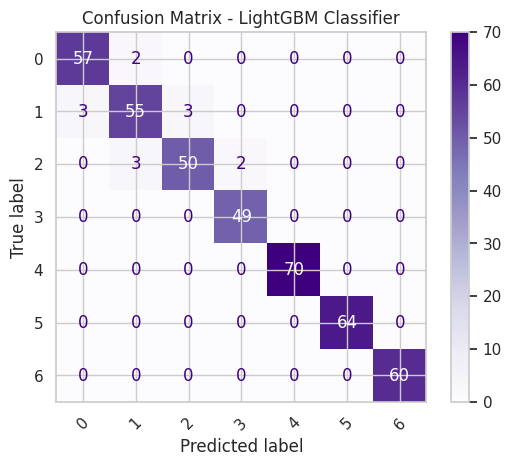

Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Start training from score -2.020537
[LightGBM] [Info] Start training from score -1.933996
[LightGBM] [Info] Start training from score -1.780586
[LightGBM] [Info] Start training from score -1.970940
[LightGBM] [Info] Start training from score -1.844828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

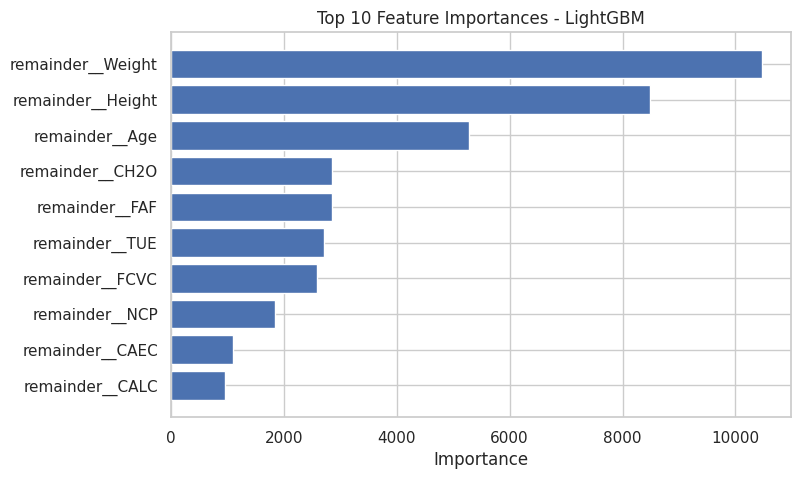

In [184]:
# ================================================
# 📦 1. Import Library
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import StratifiedKFold, cross_val_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# ================================================
# ⚙️ 2. Data Input
# ================================================
# Gunakan dataset hasil encoding (tanpa scaling)
# X_train_encoded, X_test_encoded, y_train, y_test

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# ================================================
# 🌳 3. Inisialisasi Model
# ================================================
lgbm = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# ================================================
# 🚀 4. Training Model
# ================================================
lgbm.fit(X_train_encoded, y_train)

# ================================================
# 🔍 5. Evaluasi pada Data Test
# ================================================
y_pred = lgbm.predict(X_test_encoded)

acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy (LightGBM): {acc:.4f}\n")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title("Confusion Matrix - LightGBM Classifier")
plt.show()

# ================================================
# 🔁 6. Cross Validation
# ================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lgbm, X_train_encoded, y_train, cv=cv, scoring='accuracy')

print(f"📈 Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ================================================
# 🌟 7. Feature Importance
# ================================================
importances = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔥 Top 10 Most Important Features:")
print(importances.head(10))

plt.figure(figsize=(8,5))
plt.barh(importances['Feature'].head(10), importances['Importance'].head(10))
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances - LightGBM')
plt.xlabel('Importance')
plt.show()


####CatBoost Classifier

In [180]:
# !pip install catboost

✅ Test Accuracy (CatBoost): 0.9665

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        59
           1       0.89      0.92      0.90        61
           2       0.93      0.91      0.92        55
           3       0.96      1.00      0.98        49
           4       1.00      0.99      0.99        70
           5       1.00      1.00      1.00        64
           6       1.00      1.00      1.00        60

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



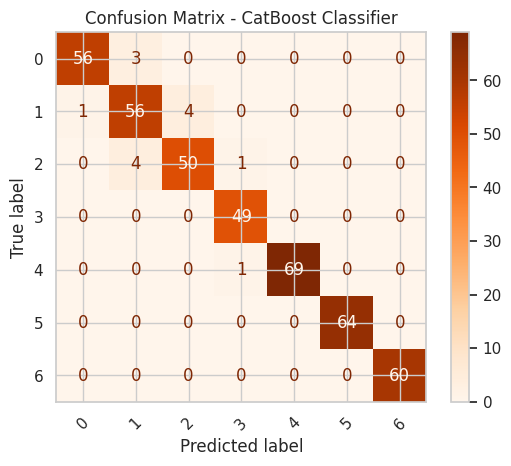

📈 Cross-validation accuracy: 0.9587 ± 0.0087

🔥 Top 10 Most Important Features:
              Feature  Importance
7   remainder__Weight   49.812193
6   remainder__Height   13.387367
0    ohe__Gender_Male    7.788616
10    remainder__FCVC    6.479076
5      remainder__Age    6.000900
11     remainder__NCP    3.061127
18    remainder__CALC    2.400803
14    remainder__CH2O    2.210631
16     remainder__FAF    2.117519
17     remainder__TUE    1.993516


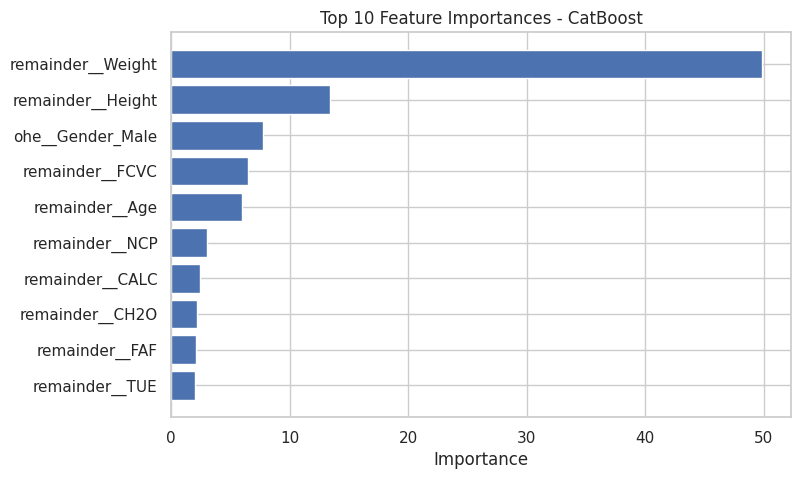

In [183]:
# ================================================
# 📦 1. Import Library
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import StratifiedKFold, cross_val_score

# ================================================
# ⚙️ 2. Data Input
# ================================================
# Gunakan dataset hasil encoding (tanpa scaling)
# X_train_encoded, X_test_encoded, y_train, y_test

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# ================================================
# 🌳 3. Inisialisasi Model (multi-class)
# ================================================
cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='MultiClass',  # ✅ ganti dari 'Logloss' ke 'MultiClass'
    verbose=0,
    random_seed=42
)

# ================================================
# 🚀 4. Training Model
# ================================================
cat.fit(X_train_encoded, y_train)

# ================================================
# 🔍 5. Evaluasi pada Data Test
# ================================================
y_pred = cat.predict(X_test_encoded)

acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy (CatBoost): {acc:.4f}\n")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges', xticks_rotation=45)
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

# ================================================
# 🔁 6. Cross Validation
# ================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(cat, X_train_encoded, y_train, cv=cv, scoring='accuracy')

print(f"📈 Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ================================================
# 🌟 7. Feature Importance
# ================================================
importances = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': cat.get_feature_importance()
}).sort_values(by='Importance', ascending=False)

print("\n🔥 Top 10 Most Important Features:")
print(importances.head(10))

plt.figure(figsize=(8,5))
plt.barh(importances['Feature'].head(10), importances['Importance'].head(10))
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances - CatBoost')
plt.xlabel('Importance')
plt.show()

# **Conclusion**

# **Business Insight**